COMPLETE PATHWAY ANALYSIS: MYOCARDIAL INFARCTION
Method: Deviation-from-Reference (10-year lookback)

1. LOADING FULL DATASET
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

2. DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION
Using Deviation-from-Reference Method (10-year lookback)
=== DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION ===
Method: deviation_from_reference
Lookback years: 10
Found target disease: Myocardial infarction (index 112)
Found 24920 patients who developed myocardial infarction

Creating trajectory features for pathway discovery...
Method: deviation_from_reference

--- COMPUTING POPULATION REFERENCE FOR DEVIATION-BASED CLUSTERING ---
Computing population-level signature reference from all 400000 patients...
Population reference shape: (21, 52)
Created 210 features 

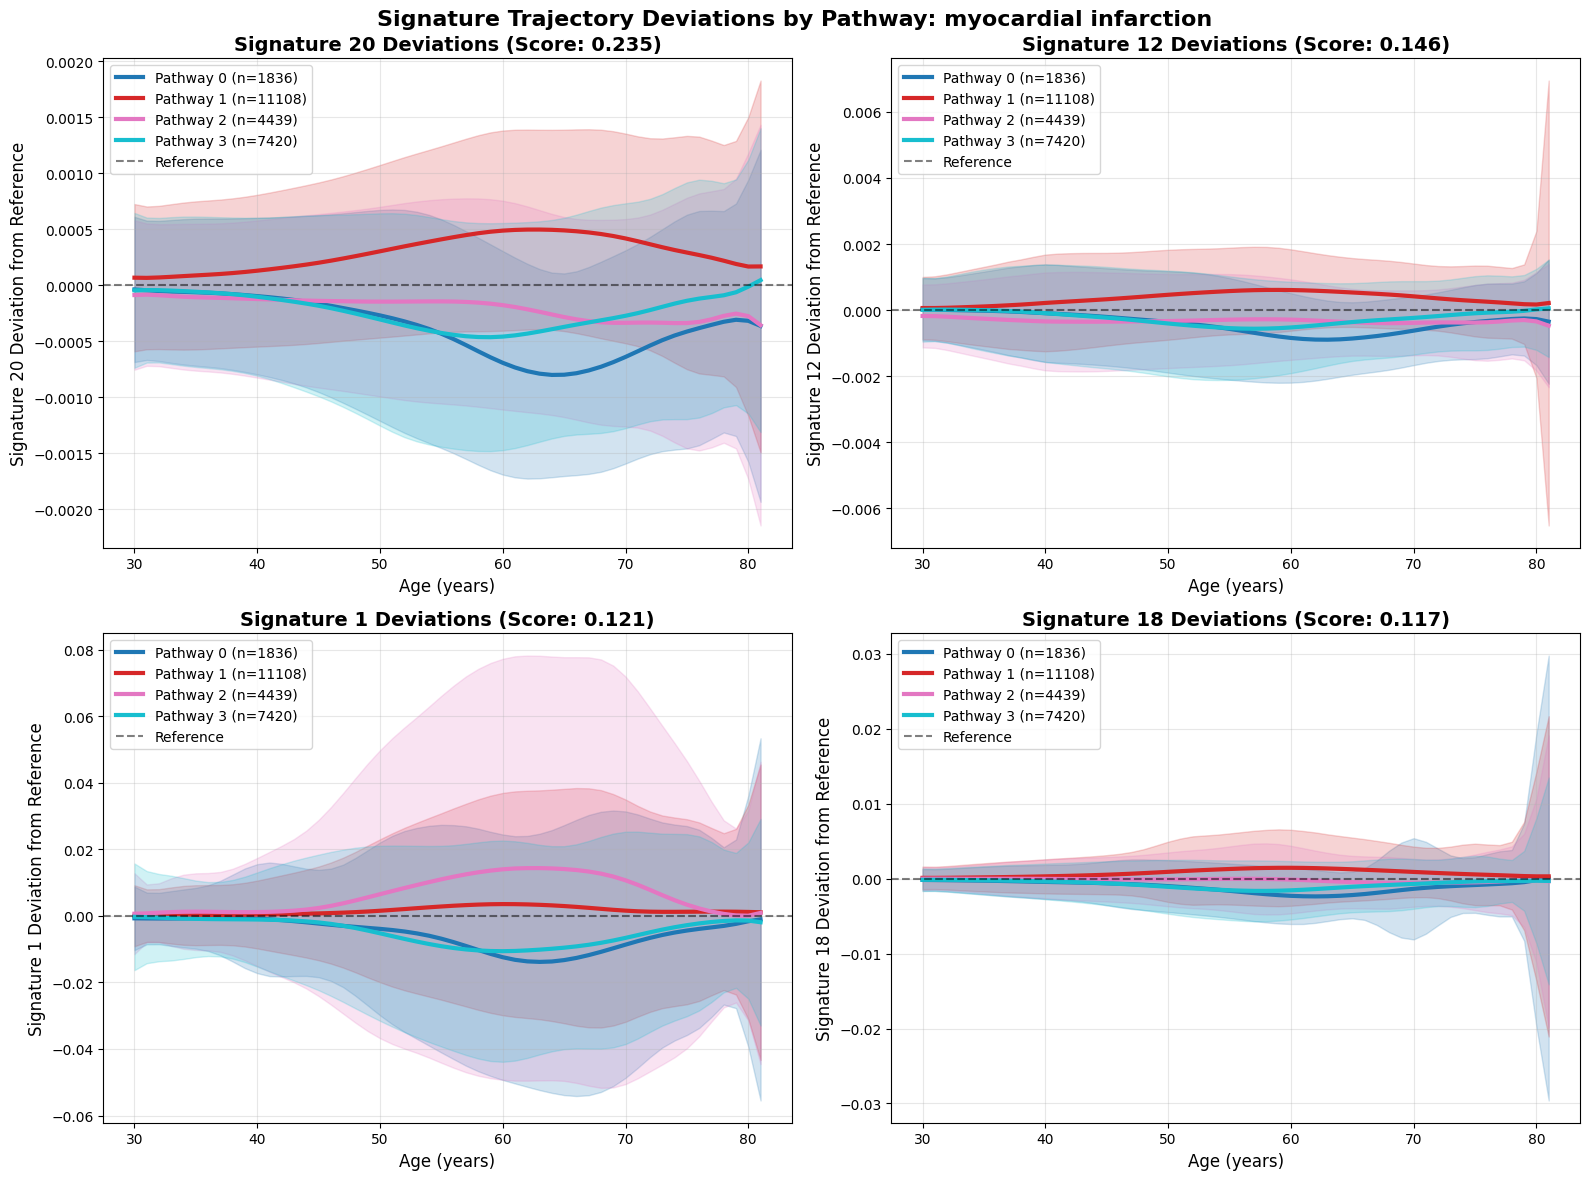

   Saved plot: output_10yr/pathway_size_and_age.pdf


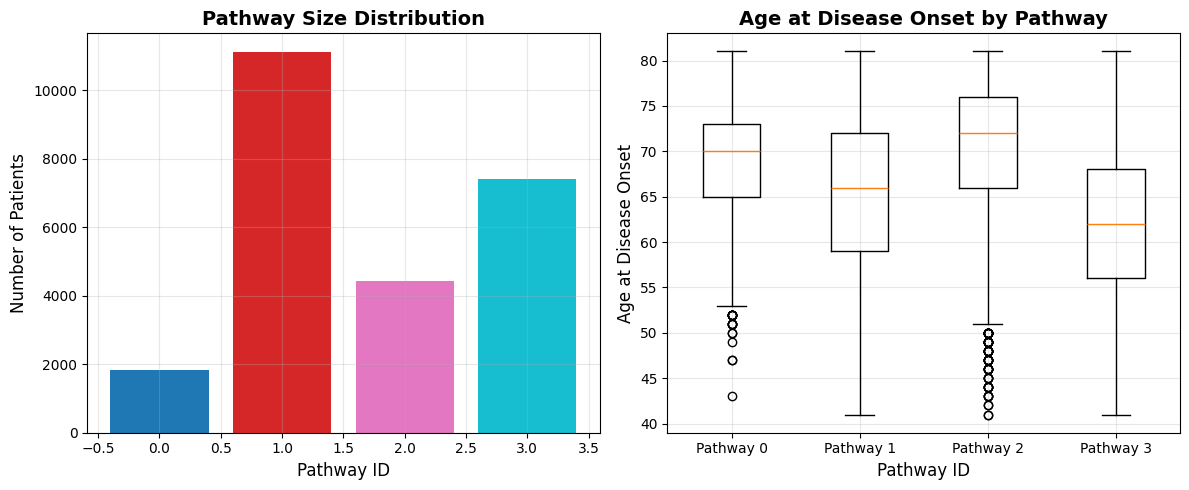


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:
   Saved plot: output_10yr/signature_deviations_by_pathway.pdf


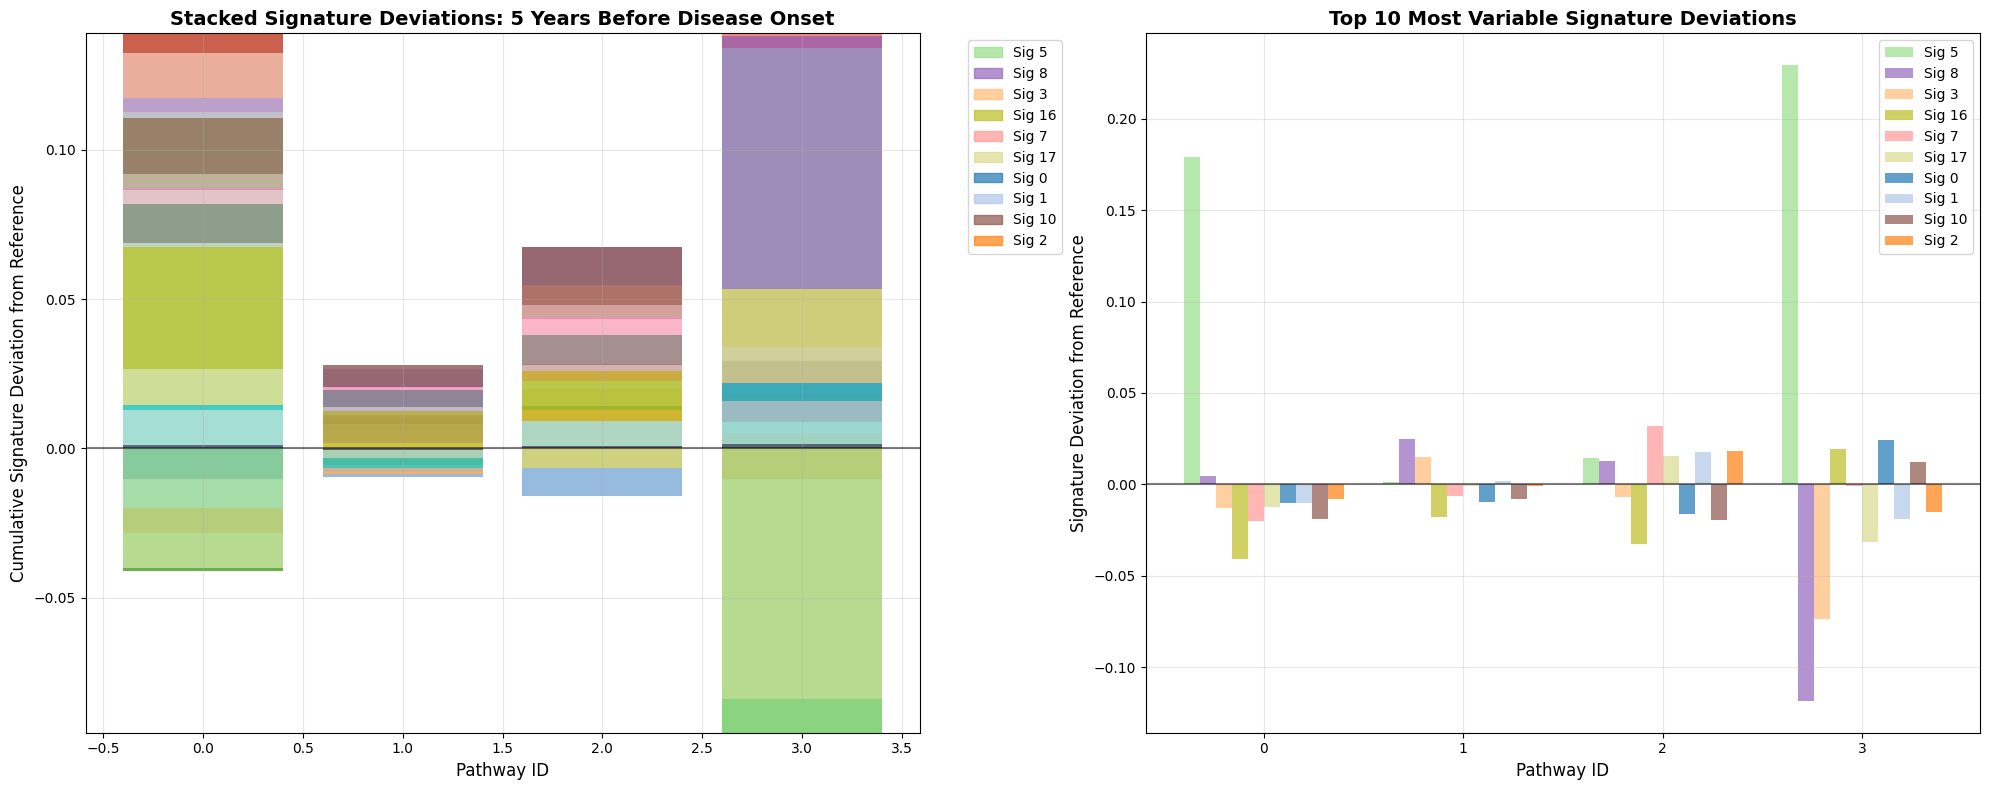


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.370
    Top 3 signatures: [(5, 0.17910814), (16, -0.041025706), (7, -0.019809388)]
  Pathway 1: Total absolute deviation = 0.112
    Top 3 signatures: [(8, 0.02484078), (16, -0.017946318), (3, 0.0149342865)]
  Pathway 2: Total absolute deviation = 0.223
    Top 3 signatures: [(16, -0.032341897), (7, 0.031873554), (10, -0.019288678)]
  Pathway 3: Total absolute deviation = 0.615
    Top 3 signatures: [(5, 0.22926128), (8, -0.118373916), (3, -0.073842525)]

3b. CREATING SIGNATURE DEVIATION PLOTS
   Saved stacked deviation plot: output_10yr/signature_deviations_myocardial_infarction_10yr_stacked.pdf
   Saved line deviation plot: output_10yr/signature_deviations_myocardial_infarction_10yr_line.pdf

4. ANALYZING MEDICATION DIFFERENCES BY PATHWAY
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS ===
Loading medication data from /Users/sarahurbut/Library/CloudStorage/Dropbox-Person

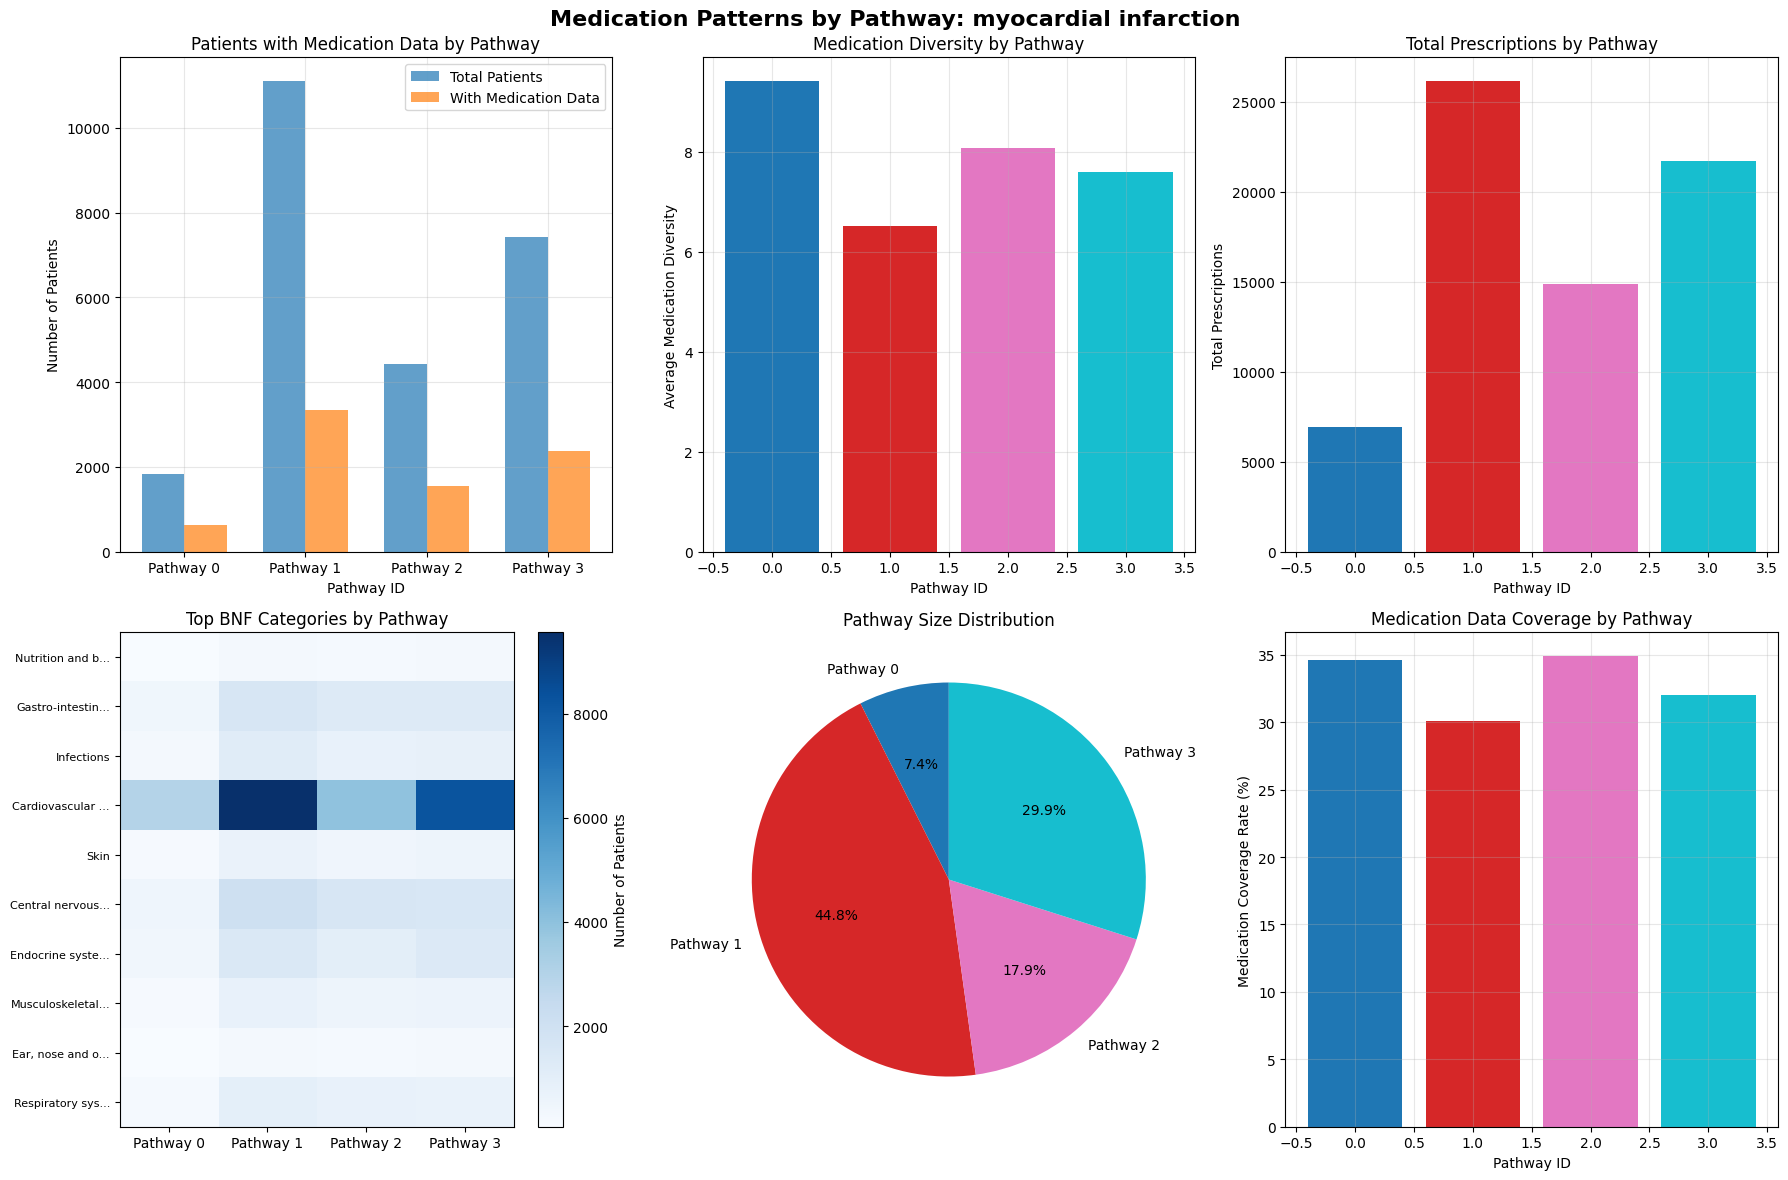


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: myocardial infarction
Total Pathways: 4
Total Patients: 24803
Patients with Medication Data: 7902

Pathway 0:
  Patients: 1836
  With meds: 636
  Coverage: 34.6%
  Medication diversity: 9.42
  Total prescriptions: 6949

Pathway 1:
  Patients: 11108
  With meds: 3343
  Coverage: 30.1%
  Medication diversity: 6.52
  Total prescriptions: 26169

Pathway 2:
  Patients: 4439
  With meds: 1550
  Coverage: 34.9%
  Medication diversity: 8.08
  Total prescriptions: 14871

Pathway 3:
  Patients: 7420
  With meds: 2373
  Coverage: 32.0%
  Medication diversity: 7.60
  Total prescriptions: 21700

5. ANALYZING PRS DIFFERENCES BY PATHWAY

=== ANALYZING POLYGENIC RISK SCORES BY PATHWAY ===
✅ Loaded PRS data: (400000, 37)
Available PRS columns: ['PatientID', 'AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG',

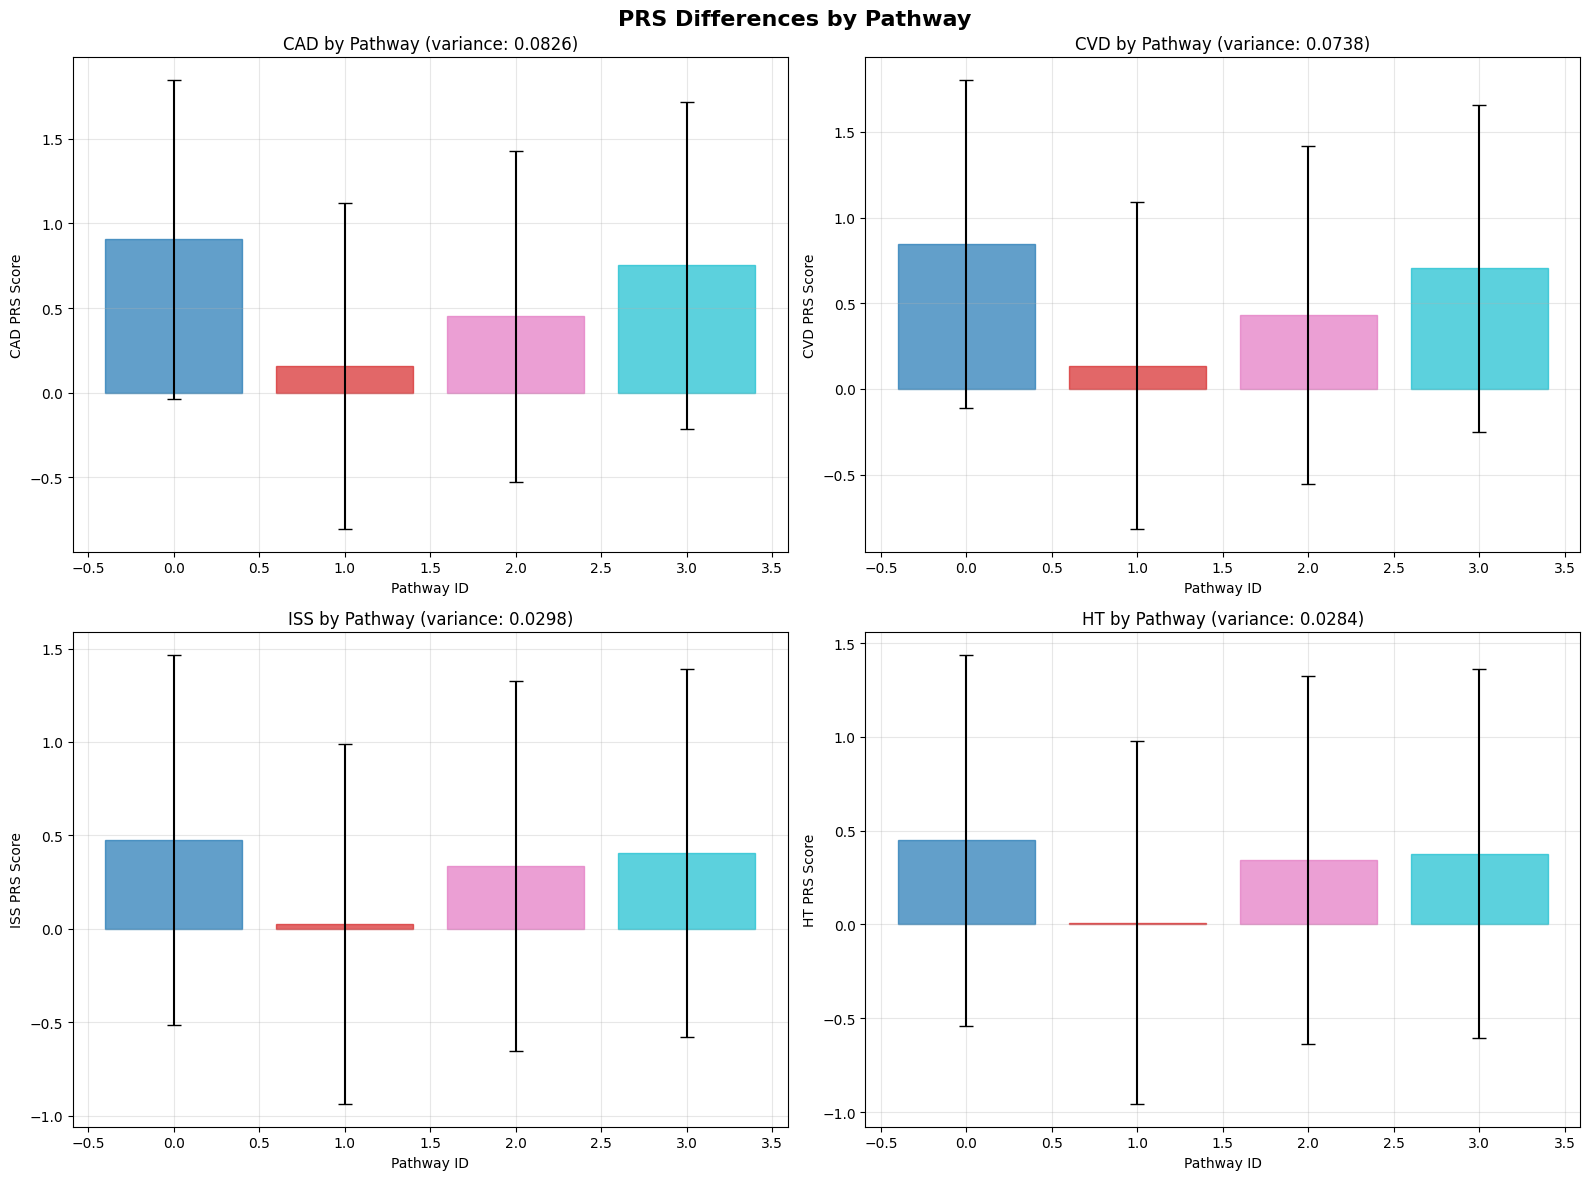


6. ANALYZING GRANULAR DISEASE PATTERNS

=== ANALYZING GRANULAR DISEASE PATTERNS BY PATHWAY ===
Including diseases with ≥1.0% prevalence in at least one pathway

DISEASES THAT DIFFERENTIATE PATHWAYS (including rare diseases):
Found 236 diseases with sufficient prevalence
Top 20 diseases that differentiate pathways (including rare diseases):

1. Coronary atherosclerosis (max prevalence: 86.3%):
   Pathway 0: 1584 patients (86.3%)
   Pathway 1: 927 patients (8.3%)
   Pathway 2: 902 patients (20.3%)
   Pathway 3: 1183 patients (15.9%)

2. Angina pectoris (max prevalence: 75.0%):
   Pathway 0: 1377 patients (75.0%)
   Pathway 1: 823 patients (7.4%)
   Pathway 2: 1014 patients (22.8%)
   Pathway 3: 915 patients (12.3%)

3. Other chronic ischemic heart disease, unspecified (max prevalence: 74.7%):
   Pathway 0: 1371 patients (74.7%)
   Pathway 1: 982 patients (8.8%)
   Pathway 2: 1048 patients (23.6%)
   Pathway 3: 935 patients (12.6%)

4. Hypercholesterolemia (max prevalence: 75.9%):
   Pat

In [1]:
from run_complete_pathway_analysis_deviation_only import run_deviation_only_analysis

# 10-year lookback (default - better biological separation)
results = run_deviation_only_analysis("myocardial infarction", n_pathways=4, 
                                     output_dir='output_10yr', lookback_years=10)


In [4]:

%load_ext autoreload
%autoreload 2

from pathway_statistical_tests import comprehensive_pathway_tests_with_medications
from pathway_discovery import load_full_data

# After the pathway analysis completes, run statistical tests:
# Load data (needed for tests)
Y, thetas, disease_names, processed_ids = load_full_data()

# Extract pathway data from results
pathway_data = results['pathway_data_dev']
target_disease_idx = pathway_data['target_disease_idx']

statistical_results = comprehensive_pathway_tests_with_medications(
    pathway_data=pathway_data,
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    target_disease_idx=target_disease_idx,
    medication_results=results.get('medication_results_dev'),  # Optional - if available
    prs_results=results.get('prs_results_dev'),  # Optional - if available
    output_dir='output_10yr'
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
COMPREHENSIVE STATISTICAL TESTS FOR PATHWAY GROUPS

1. Testing disease prevalence differences...
   Found 317 significantly different diseases (FDR < 0.05)

2. Testing signature trajectory differences...
   Found 21 signatures with significant differences (p < 0.05)

3. Testing age at disease onset differences...
   ANOVA: F=946.384, p=0.0000

4. Permutation test for pathway stability...
   Observed variance: 0.0000
   Permuted mean: 0.0000
   p-value: 0.0000

5. Testing medication prevalence differences...
   Found 15 medications with significant differences (FDR < 0.05)

6. PRS differences (from pathway_interrogation)...
   PRS analysis results i

In [5]:
from create_statistical_figures_and_tables import main

# Generate all tables and figures
results = main(output_dir='output_10yr')

GENERATING PUBLICATION-READY TABLES AND FIGURES

Loading statistical test results...

--- CREATING TABLES ---
✅ Created top 20 diseases table
✅ Created signature discrimination table
✅ Created top 15 medications table
✅ Created age at onset table
✅ Created summary statistics table

--- CREATING FIGURES ---
✅ Created signature discrimination plot
✅ Created age at onset plot
✅ Created effect sizes heatmap
✅ Created disease prevalence examples plot (top 9)

✅ ALL TABLES AND FIGURES GENERATED!
📁 Output directory: output_10yr/


In [11]:
%load_ext autoreload
%autoreload 2
from analyze_sig5_by_pathway import *
a=analyze_signature5_by_pathway()
create_prevalence_barplots(a, output_dir='output_10yr', target_disease='myocardial infarction')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ANALYZING SIGNATURE 5 IN EACH MI PATHWAY
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

Analyzing 4 pathways...
Found precursor disease indices:
  coronary atherosclerosis: index 114
  hypercholesterolemia: index 52
  angina: index 111
  hypertension: index 109
  diabetes: index 46
  obesity: index 60

PATHWAY 0
Number of patients: 1836

Precursor Disease Prevalence (BEFORE MI):
  coronary atherosclerosis: 1584 (86.3%)
  hypercholesterolemia: 1393 (75.9%)
  angina: 647 (35.2%)
  hypertension: 1374 (74.8%)
  diabetes: 63 (3.4%)
  obesity: 216 (11.8%)

Reference population prevalence up to average MI age (≈ 68.9y):
  coronary atherosclerosis: ref 5.4%, pathway 86.3% (Δ +80.9 pp)
  hypercholester

In [25]:
from pathway_pi_analysis_improved import plot_mi_pi_trajectories_side_by_side

plot_mi_pi_trajectories_side_by_side(
    pi_all=pi_all,
    patients_low=p1_low,
    patients_high=p1_high,
    disease_names=disease_names,
    out_dir=OUTPUT_DIR,
    years_before=10,
    label_low="Low CAD PRS",
    label_high="High CAD PRS"
)


import pickle as pkl
import pandas as pd
import numpy as np
from pathway_discovery import load_full_data
from pathway_pi_analysis_improved import plot_mi_pi_trajectories_comparative

OUTPUT_DIR = 'output_10yr'
PRS_PATH = '/Users/sarahurbut/aladynoulli2/pyScripts/prs_with_eid.csv'
CAD_COL = 'CAD'

# Load everything
Y, thetas, disease_names, processed_ids = load_full_data()
res = pkl.load(open(f'{OUTPUT_DIR}/complete_analysis_results.pkl', 'rb'))
mi_patients_all = res['pathway_data_dev']['patients']
prs = pd.read_csv(PRS_PATH)

# 1. Extract Pathway 1 low/high PRS (same as before)
p1 = [p for p in mi_patients_all if p['pathway'] == 1]
pid_to_eid = {pid: processed_ids[pid] for pid in [p['patient_id'] for p in p1] if pid < len(processed_ids)}
for p in p1:
    p['eid'] = pid_to_eid.get(p['patient_id'], None)
p1 = [p for p in p1 if p.get('eid') is not None]

p1_df = pd.DataFrame({'eid':[p['eid'] for p in p1], 'patient_id':[p['patient_id'] for p in p1], 'age_at_disease':[p['age_at_disease'] for p in p1]})
p1_prs = p1_df.merge(prs, left_on='eid', right_on='PatientID', how='inner')
median_cad = p1_prs[CAD_COL].median()
low_ids = set(p1_prs[p1_prs[CAD_COL] <= median_cad]['patient_id'])
high_ids = set(p1_prs[p1_prs[CAD_COL] > median_cad]['patient_id'])

p1_low = [dict(patient_id=pid, pathway=1, age_at_disease=next(p['age_at_disease'] for p in p1 if p['patient_id']==pid)) for pid in low_ids]
p1_high = [dict(patient_id=pid, pathway=1, age_at_disease=next(p['age_at_disease'] for p in p1 if p['patient_id']==pid)) for pid in high_ids]

# 2. Find ALL MI patients (any pathway) and exclude them from population
all_mi_pids = set([p['patient_id'] for p in mi_patients_all])
all_non_mi_pids = [pid for pid in range(len(processed_ids)) if pid not in all_mi_pids]

# 3. Get PRS for non-MI population
non_mi_eids = [processed_ids[pid] for pid in all_non_mi_pids if pid < len(processed_ids)]
non_mi_df = pd.DataFrame({'patient_id': all_non_mi_pids, 'eid': non_mi_eids})
non_mi_prs = non_mi_df.merge(prs, left_on='eid', right_on='PatientID', how='inner')

# 4. Median split in NON-MI population
median_cad_pop = non_mi_prs[CAD_COL].median()
low_pop_ids = set(non_mi_prs[non_mi_prs[CAD_COL] <= median_cad_pop]['patient_id'])
high_pop_ids = set(non_mi_prs[non_mi_prs[CAD_COL] > median_cad_pop]['patient_id'])

# 5. Sample ~same size as Pathway 1
sample_size = min(len(p1_low), len(p1_high), 1000)  # reasonable sample
import random
low_pop_ids = set(random.sample(list(low_pop_ids), min(len(low_pop_ids), sample_size)))
high_pop_ids = set(random.sample(list(high_pop_ids), min(len(high_pop_ids), sample_size)))

pop_low = [dict(patient_id=pid, pathway=-1, age_at_disease=65) for pid in low_pop_ids]
pop_high = [dict(patient_id=pid, pathway=-1, age_at_disease=65) for pid in high_pop_ids]

# 6. Plot comparative
pi_all = np.load(f'{OUTPUT_DIR}/all_pi_values.npy', mmap_mode='r')

plot_mi_pi_trajectories_comparative(
    pi_all=pi_all,
    patients_pathway_low=p1_low,
    patients_pathway_high=p1_high,
    patients_pop_low=pop_low,
    patients_pop_high=pop_high,
    disease_names=disease_names,
    out_dir=OUTPUT_DIR,
    years_before=10
)

Saved side-by-side plot: output_10yr/mi_pi_trajectories_prs_stratified.png
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
Saved comparative plot: output_10yr/mi_pi_trajectories_pathway_vs_population_by_prs.png


In [27]:
from investigate_sig5_vs_precursors import investigate_sig5_vs_precursors
results = investigate_sig5_vs_precursors()

INVESTIGATING SIGNATURE 5 vs PRECURSOR DISEASE LEVELS
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

Precursor disease indices: {'coronary atherosclerosis': 114, 'hypercholesterolemia': 52, 'angina': 111, 'hypertension': 109, 'diabetes': 46, 'obesity': 60}

PATHWAY 0 (n=1836)
Average Signature 5 deviation: +0.2375

Pathway precursor burden (normalized): 0.4790
Population precursor burden (normalized): 0.0747
Precursor deviation from population: +0.4043

Population Signature 5 at age 68.9: 0.0765

Precursor prevalences (pathway vs population):
  coronary atherosclerosis: pathway 86.3%, population 5.4%
  hypercholesterolemia: pathway 75.9%, population 9.5%
  angina: pathway 35.2%, population 1.4%
  hypertension: pathway 74.8%, population 22.5%
  diabetes: pathway 3.4%, population 0

In [28]:
from investigate_all_signatures_by_pathway import investigate_all_signatures
results = investigate_all_signatures()

INVESTIGATING ALL SIGNATURES BY PATHWAY
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

Analyzing 4 pathways with 400000 patients

PATHWAY 0 (n=1836)
Top 5 elevated signatures:
  1. Signature 5: +0.2375
  2. Signature 0: +0.0073
  3. Signature 15: -0.0014
  4. Signature 4: -0.0016
  5. Signature 20: -0.0017

PATHWAY 1 (n=11108)
Top 5 elevated signatures:
  1. Signature 5: +0.0470
  2. Signature 0: +0.0047
  3. Signature 13: +0.0018
  4. Signature 14: +0.0013
  5. Signature 4: +0.0002

PATHWAY 2 (n=4439)
Top 5 elevated signatures:
  1. Signature 5: +0.0394
  2. Signature 7: +0.0204
  3. Signature 2: +0.0120
  4. Signature 17: +0.0055
  5. Signature 1: +0.0034

PATHWAY 3 (n=7420)
Top 5 elevated signatures:
  1. Signature 5: +0.1240
  2. Signature 0: +0.0053
  3. Signature 16: +0.003

In [1]:
import pandas as pd
disease_names = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/disease_names.csv')['x'].tolist()

In [15]:
import os
import pickle as pkl
import numpy as np
import torch
OUTPUT_DIR = 'output_10yr'
os.makedirs(OUTPUT_DIR, exist_ok=True)

def compute_or_load_pi_all():
    Y, thetas, disease_names, _ = load_full_data()
    N, K, T = thetas.shape
    D = len(disease_names)

    pi_path = f'{OUTPUT_DIR}/all_pi_values.npy'
    if os.path.exists(pi_path):
        print(f'Loading cached π from {pi_path}')
        pi_all = np.load(pi_path, mmap_mode='r')  # memory-friendly
        return pi_all, (Y, thetas, disease_names)

    print('Computing π for all 400K patients (40 batches of 10K)...')
    batch_size, n_batches = 10000, N // 10000
    pi_all_list = []

    for b in range(n_batches):
        start, end = b*batch_size, (b+1)*batch_size
        print(f'Batch {b}/{n_batches}: patients {start}-{end}')
        model_path = f'/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_retrospective_full/enrollment_model_W0.0001_batch_{start}_{end}.pt'

        md = torch.load(model_path, weights_only=False)['model_state_dict']
        phi = md['phi'].detach().numpy()       # [K, D, T]
        kappa = md['kappa'].item() if isinstance(md['kappa'], torch.Tensor) else float(md['kappa'])
        phi_prob = 1.0/(1.0+np.exp(-phi))      # sigmoid

        batch_theta = thetas[start:end, :, :]  # [10K, K, T]
        batch_pi = np.zeros((batch_theta.shape[0], D, T), dtype=np.float32)

        # vectorized across patients for each (d,t)
        for d in range(D):
            for t in range(T):
                batch_pi[:, d, t] = (batch_theta[:, :, t] @ phi_prob[:, d, t]) * kappa

        pi_all_list.append(batch_pi)
        del md, phi, phi_prob, batch_theta, batch_pi
        import gc; gc.collect()

    pi_all = np.concatenate(pi_all_list, axis=0)  # [400K, D, T]
    np.save(pi_path, pi_all)
    print(f'Saved π to {pi_path} with shape {pi_all.shape}')
    return pi_all, (Y, thetas, disease_names)

def analyze_pi_at_mi_by_pathway(pi_all, y_thetas_names, pathway_results_pkl):
    Y, thetas, disease_names = y_thetas_names
    # load pathway outputs (from run_deviation_only_analysis)
    results = pkl.load(open(pathway_results_pkl, 'rb'))
    path_data = results['pathway_data_dev']
    mi_patients = path_data['patients']  # list of dicts with patient_id, pathway, age_at_disease
    n_pathways = len(np.unique([p['pathway'] for p in mi_patients]))
    D, T = len(disease_names), pi_all.shape[2]

    # π at MI time per MI patient
    per_patient = []
    for p in mi_patients:
        pid = p['patient_id']
        t_idx = int(p['age_at_disease'] - 30)
        if 0 <= t_idx < T:
            pi_at_mi = pi_all[pid, :, t_idx]  # [D]
            per_patient.append({
                'patient_id': pid,
                'pathway': p['pathway'],
                'age_at_mi': p['age_at_disease'],
                't_idx': t_idx,
                'pi_at_mi': pi_at_mi
            })

    # population baseline at each MI time index
    # build population π at each time index once
    pop_pi_by_t = np.array([pi_all[:, :, t].mean(axis=0) for t in range(T)])  # [T, D]

    # aggregate by pathway
    out = {}
    for pw in range(n_pathways):
        pts = [r for r in per_patient if r['pathway'] == pw]
        if not pts: 
            continue
        # average MI time (use for pop baseline)
        avg_t = int(np.round(np.mean([r['t_idx'] for r in pts])))
        avg_t = max(0, min(T-1, avg_t))
        # pathway mean π at MI
        pw_pi_at_mi = np.mean(np.stack([r['pi_at_mi'] for r in pts], axis=0), axis=0)  # [D]
        pop_pi = pop_pi_by_t[avg_t]  # [D]
        delta = pw_pi_at_mi - pop_pi
        hr = np.divide(pw_pi_at_mi, pop_pi + 1e-12)

        out[pw] = {
            'n_patients': len(pts),
            'avg_t_idx': avg_t,
            'pathway_pi_at_mi': pw_pi_at_mi,
            'population_pi_at_age': pop_pi,
            'delta': delta,
            'hazard_ratio': hr
        }

    # save and return
    save_pkl = f'{OUTPUT_DIR}/pathway_pi_analysis_results.pkl'
    pkl.dump(out, open(save_pkl, 'wb'))
    print(f'Saved pathway π analysis to {save_pkl}')

    # also quick CSV of top diffs per pathway
    import pandas as pd
    rows = []
    for pw, rec in out.items():
        for d_idx, d_name in enumerate(disease_names):
            rows.append({
                'pathway': pw,
                'disease': d_name,
                'pi_pathway_at_mi': rec['pathway_pi_at_mi'][d_idx],
                'pi_pop_at_age': rec['population_pi_at_age'][d_idx],
                'delta': rec['delta'][d_idx],
                'hazard_ratio': rec['hazard_ratio'][d_idx],
                'n_patients': rec['n_patients'],
                't_idx': rec['avg_t_idx'],
            })
    df = pd.DataFrame(rows)
    df.sort_values(['pathway','hazard_ratio'], ascending=[True, False]).to_csv(
        f'{OUTPUT_DIR}/pathway_pi_analysis_results.csv', index=False)
    print(f'Saved CSV: {OUTPUT_DIR}/pathway_pi_analysis_results.csv')
    return out

# 1) compute/load π
pi_all, y_thetas_names = compute_or_load_pi_all()

# 2) analyze by pathway relative to population at same age
pathway_out = analyze_pi_at_mi_by_pathway(
    pi_all, 
    y_thetas_names, 
    pathway_results_pkl=f'{OUTPUT_DIR}/complete_analysis_results.pkl'
)

Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
Computing π for all 400K patients (40 batches of 10K)...
Batch 0/40: patients 0-10000
Batch 1/40: patients 10000-20000
Batch 2/40: patients 20000-30000
Batch 3/40: patients 30000-40000
Batch 4/40: patients 40000-50000
Batch 5/40: patients 50000-60000
Batch 6/40: patients 60000-70000
Batch 7/40: patients 70000-80000
Batch 8/40: patients 80000-90000
Batch 9/40: patients 90000-100000
Batch 10/40: patients 100000-110000
Batch 11/40: patients 110000-120000
Batch 12/40: patients 120000-130000
Batch 13/40: patients 130000-140000
Batch 14/40: patients 140000-150000
Batch 15/40: patients 150000-160000
Batch 16/40: patients 160000-170000
Batch 17/40: patients 170000-180000
Batch 18/40: patients 180000-190000
Batch 19/40: patients 190000-200000


In [23]:
from pathway_pi_analysis_improved import plot_mi_pi_trajectories

# Reuse the same mi_patients list the earlier analysis used:
res = pkl.load(open(f'{OUTPUT_DIR}/complete_analysis_results.pkl', 'rb'))
mi_patients = res['pathway_data_dev']['patients']
_, _, disease_names = y_thetas_names

plot_mi_pi_trajectories(
    pi_all=pi_all,
    patients=mi_patients,
    disease_names=disease_names,
    out_dir=OUTPUT_DIR,
    years_before=10
)

Saved MI π trajectory plots to: output_10yr/mi_pi_trajectories.png and output_10yr/mi_pi_delta.png


In [10]:
# Run the fixed transition analysis to get meaningful statistics
from transition_signature_analysis import run_transition_analysis

import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')

from pathway_discovery import load_full_data

# Load data
Y, thetas, disease_names, processed_ids = load_full_data()


Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000


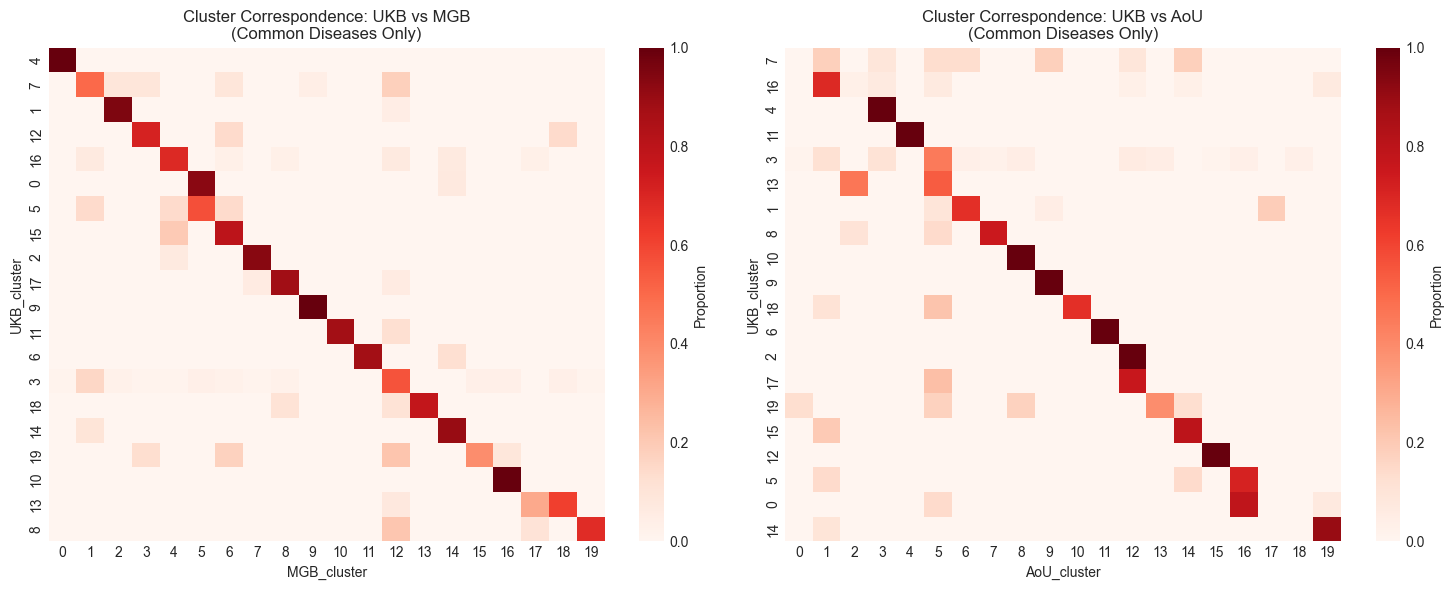

{'cross_tab_mgb': MGB_cluster        0         1         2         3         4         5   \
 UKB_cluster                                                               
 0            0.000000  0.000000  0.000000  0.000000  0.000000  0.928571   
 1            0.000000  0.000000  0.952381  0.000000  0.000000  0.000000   
 2            0.000000  0.000000  0.000000  0.000000  0.066667  0.000000   
 3            0.012195  0.158537  0.024390  0.012195  0.012195  0.036585   
 4            1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 5            0.000000  0.142857  0.000000  0.000000  0.142857  0.571429   
 6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 7            0.000000  0.500000  0.090909  0.090909  0.000000  0.000000   
 8            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 9            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 10           0.000000  0.000000  0.000000  0.000000  0.000000  0.00000

In [18]:
plot_disease_blocks(mgb_checkpoint,aou_checkpoint,ukb_checkpoint)

TRANSITION SIGNATURE ANALYSIS: MYOCARDIAL INFARCTION
=== FINDING DISEASE TRANSITIONS TO MYOCARDIAL INFARCTION ===
Target disease: Myocardial infarction (index 112)
Found transition disease: Rheumatoid arthritis (index 297)
Found transition disease: Type 1 diabetes (index 46)
Found transition disease: Essential hypertension (index 109)
Found transition disease: Hypercholesterolemia (index 52)
Found transition disease: Obesity (index 60)
Found transition disease: Major depressive disorder (index 66)
Found transition disease: Anxiety disorder (index 67)
Found 24920 patients with myocardial infarction

=== TRANSITION GROUP SUMMARY ===
rheumatoid arthritis: 509 patients
diabetes: 533 patients
hypertension: 8650 patients
hypercholesterolemia: 5067 patients
obesity: 1465 patients
Major depressive disorder: 1183 patients
anxiety disorder: 615 patients
no_transition: 14427 patients

=== ANALYZING SIGNATURE PATTERNS BY TRANSITION (PER-TIMEPOINT) ===
Computing population reference (sig_refs)...
P

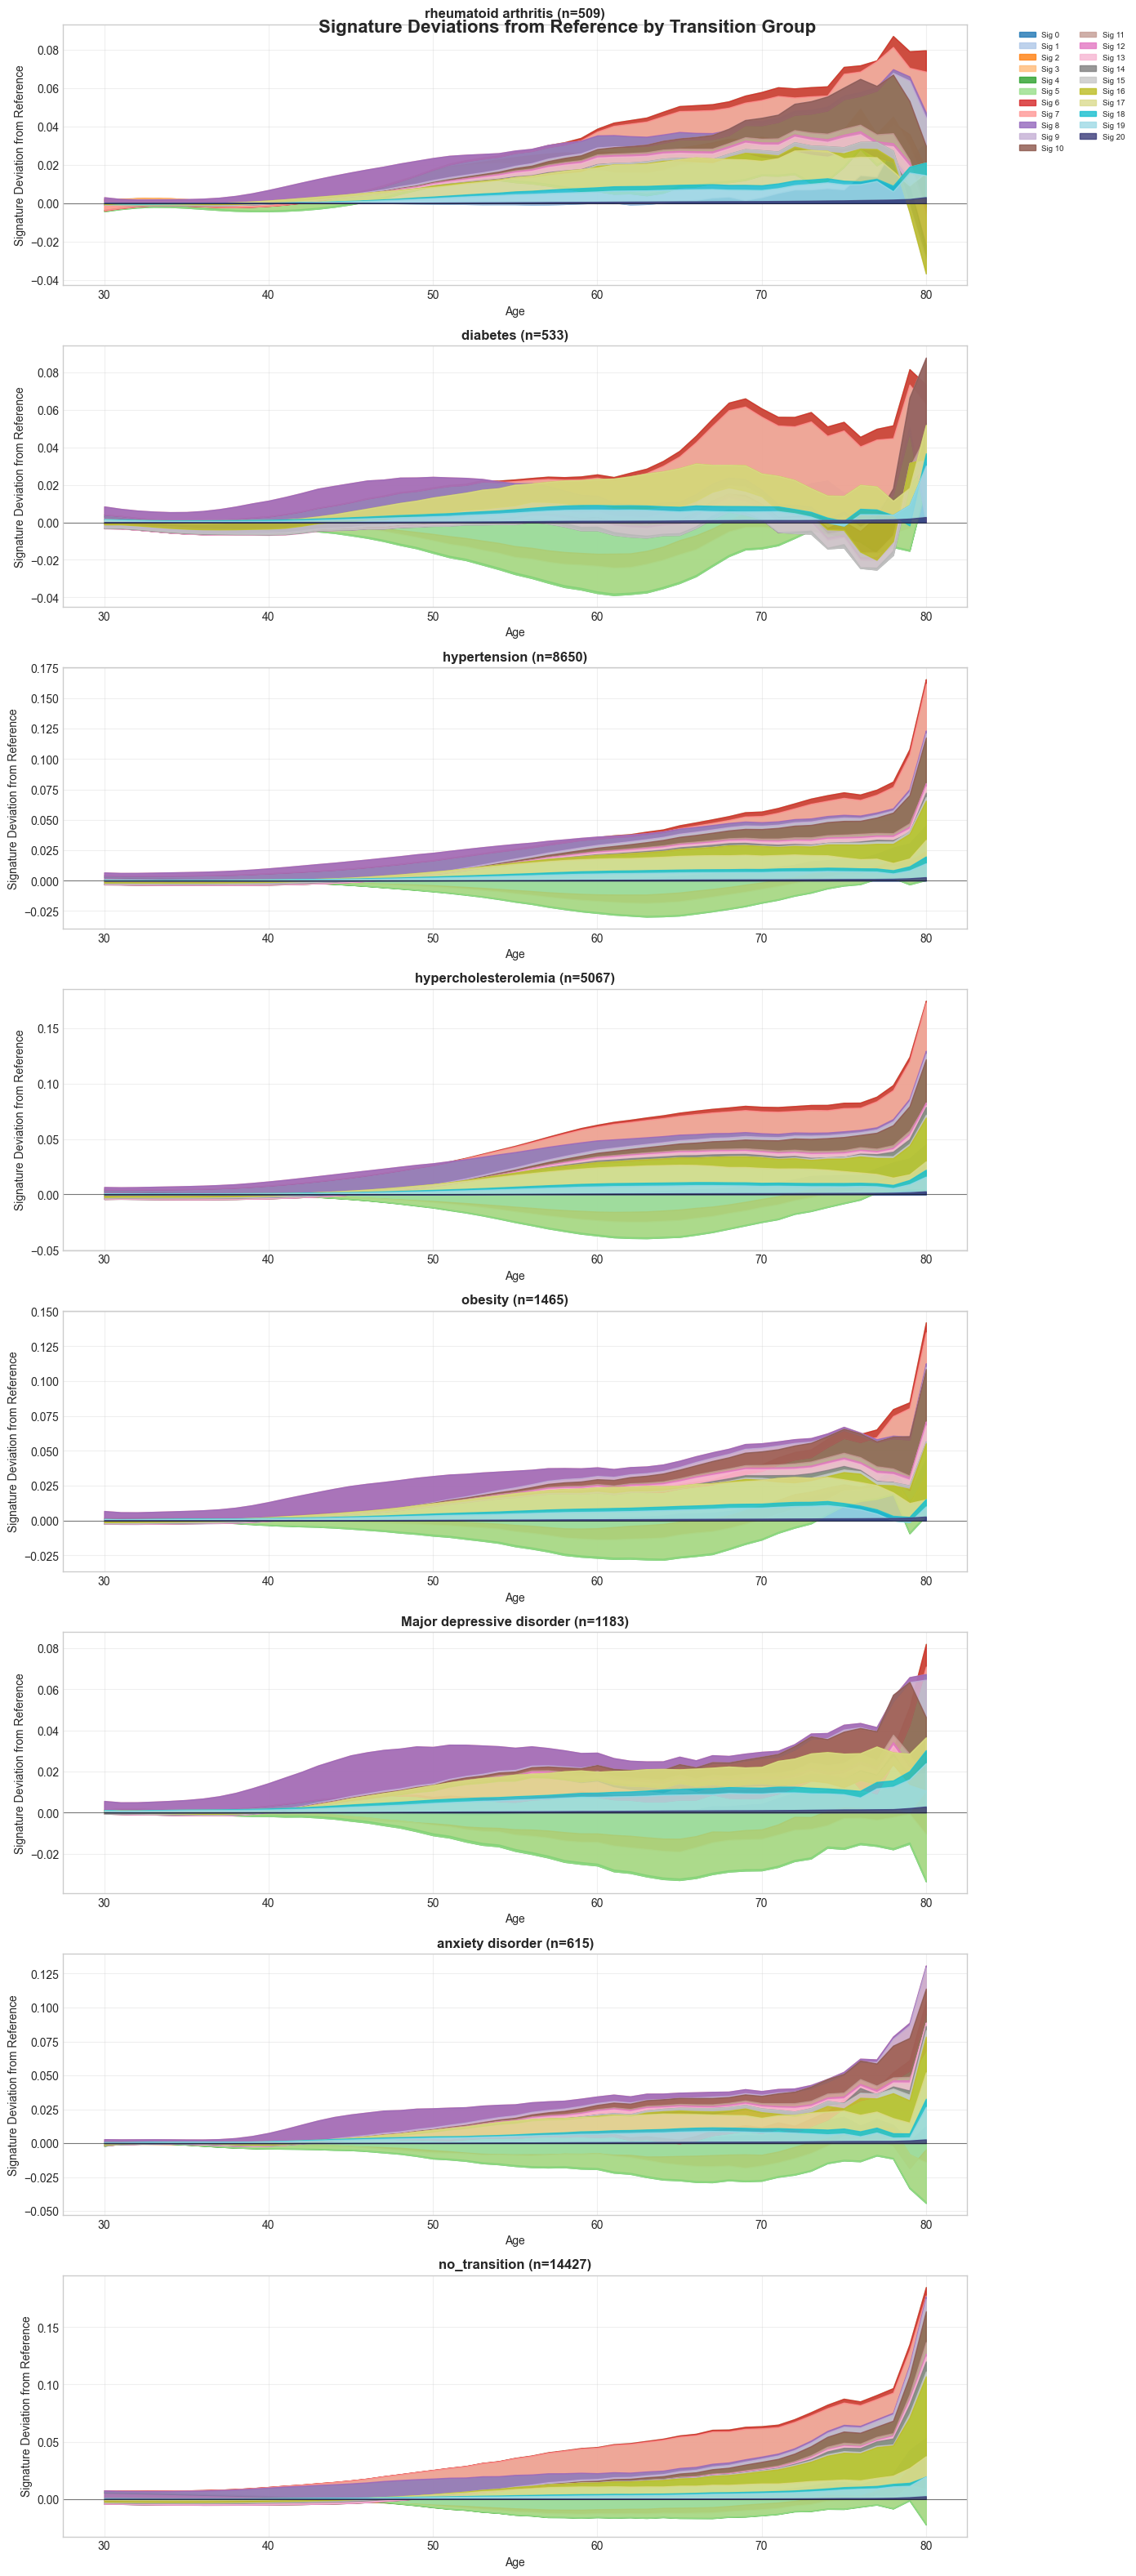

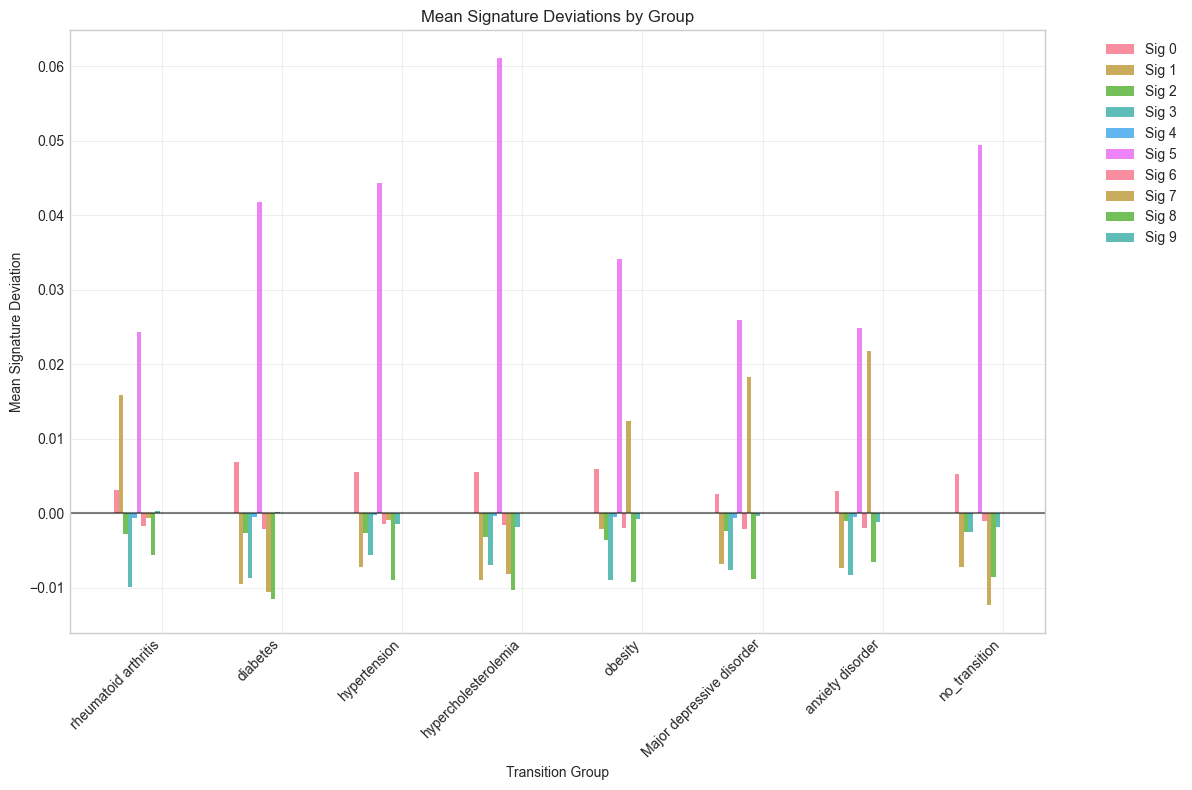

✅ Created R-style visualizations for 8 transition groups


In [7]:

# Define transition diseases to analyze
transition_diseases = [
    "rheumatoid arthritis",
    "diabetes", 
    "hypertension",
    "hypercholesterolemia",
    "obesity",
    "Major depressive disorder",
    "anxiety disorder"
]

# Run the analysis
results = run_transition_analysis(
    target_disease="myocardial infarction",
    transition_diseases=transition_diseases,
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    processed_ids=processed_ids
)


In [8]:
%load_ext autoreload
%autoreload 2


BC PROGRESSION ANALYSIS (MATCHED ON AGE AT BC DIAGNOSIS)
  Precursor: Rheumatoid arthritis
  Target: myocardial infarction
  Plotting: 10 years leading up to MI
  Age tolerance: ±5 years

Found target disease: Myocardial infarction (index 112)
Found transition disease: Rheumatoid arthritis (index 297)
Population reference shape: (21, 52)
Found 509 BC patients who develop MI
Found 7796 BC patients who DON'T develop MI

=== AGE MATCHING AT BC DIAGNOSIS ===
Found 509 age-matched pairs
Average time from BC to MI: 7 years

Analyzing 10 years
Progressors (BC→MI): 509 patients
Non-progressors (BC only): 507 patients

Plot saved as 'bc_progression_Rheumatoid_arthritis_matched_on_bc_age.png'

VERIFICATION: Signature 5 Deviations

Signature 5 - BC patients who develop MI:
  Values (years -10 to -1): [0.00614689 0.00846632 0.01288823 0.01997185 0.03019964 0.04367169
 0.06005038 0.07815162 0.0955545  0.11044265]
  At -2 years: 0.0956

Signature 5 - BC patients who DON'T develop MI:
  Values (year

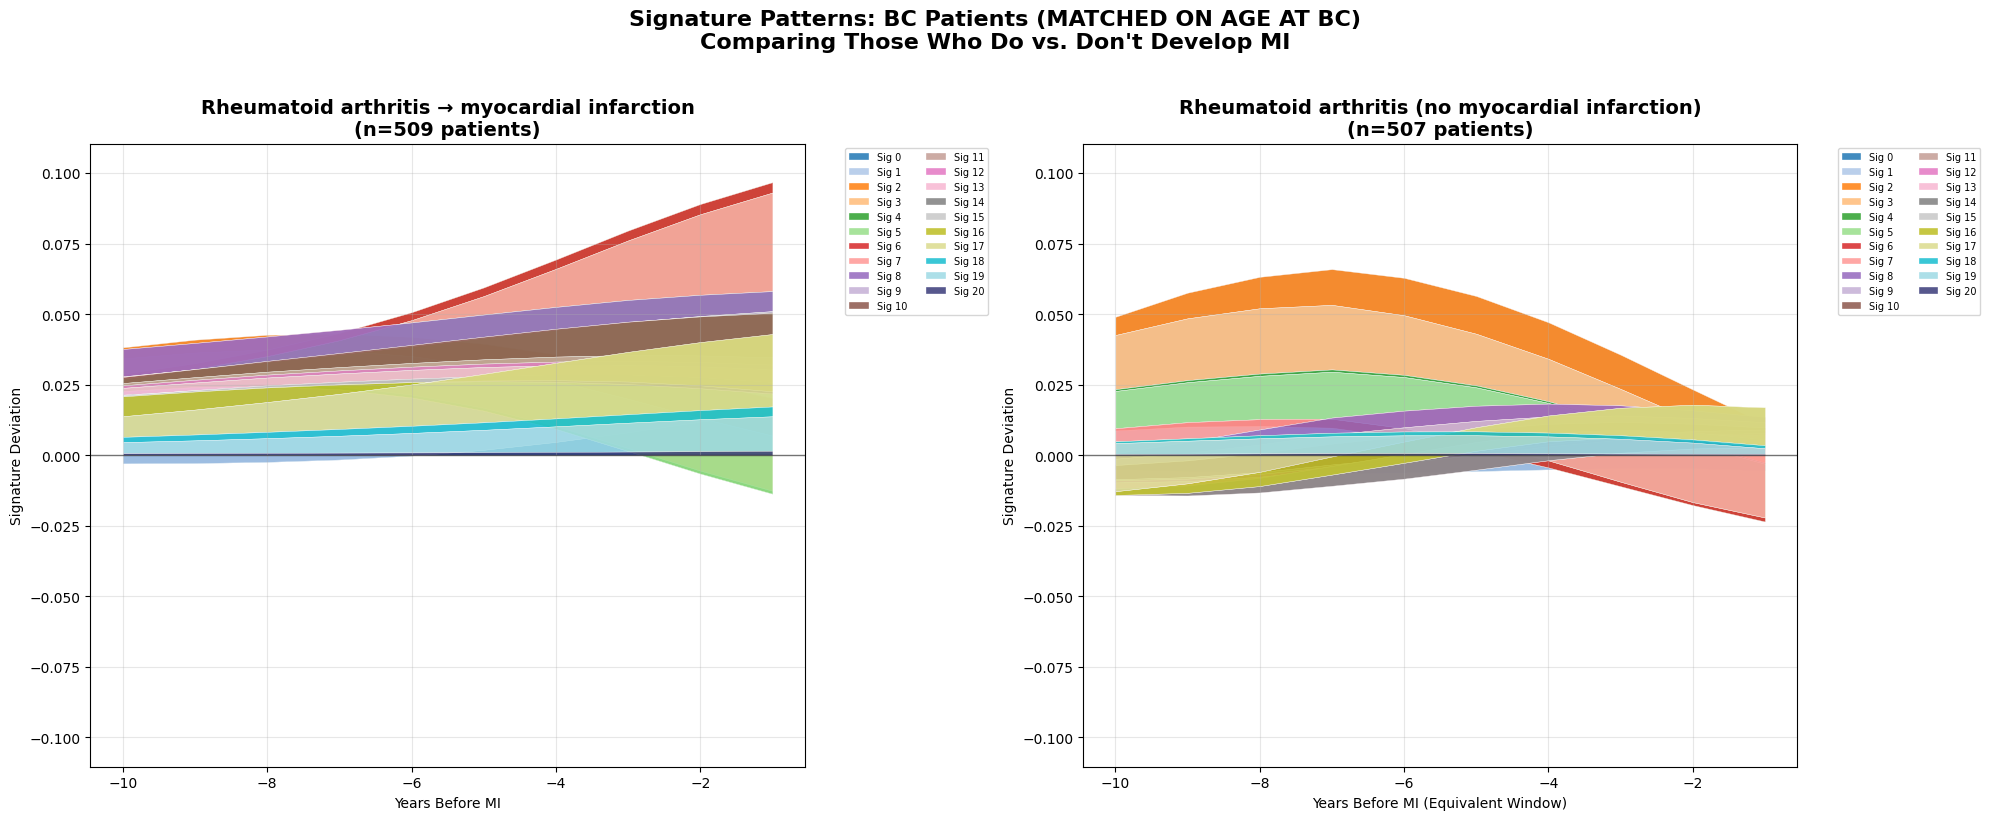

Line plot saved as 'bc_progression_line_plot_Rheumatoid_arthritis.png'


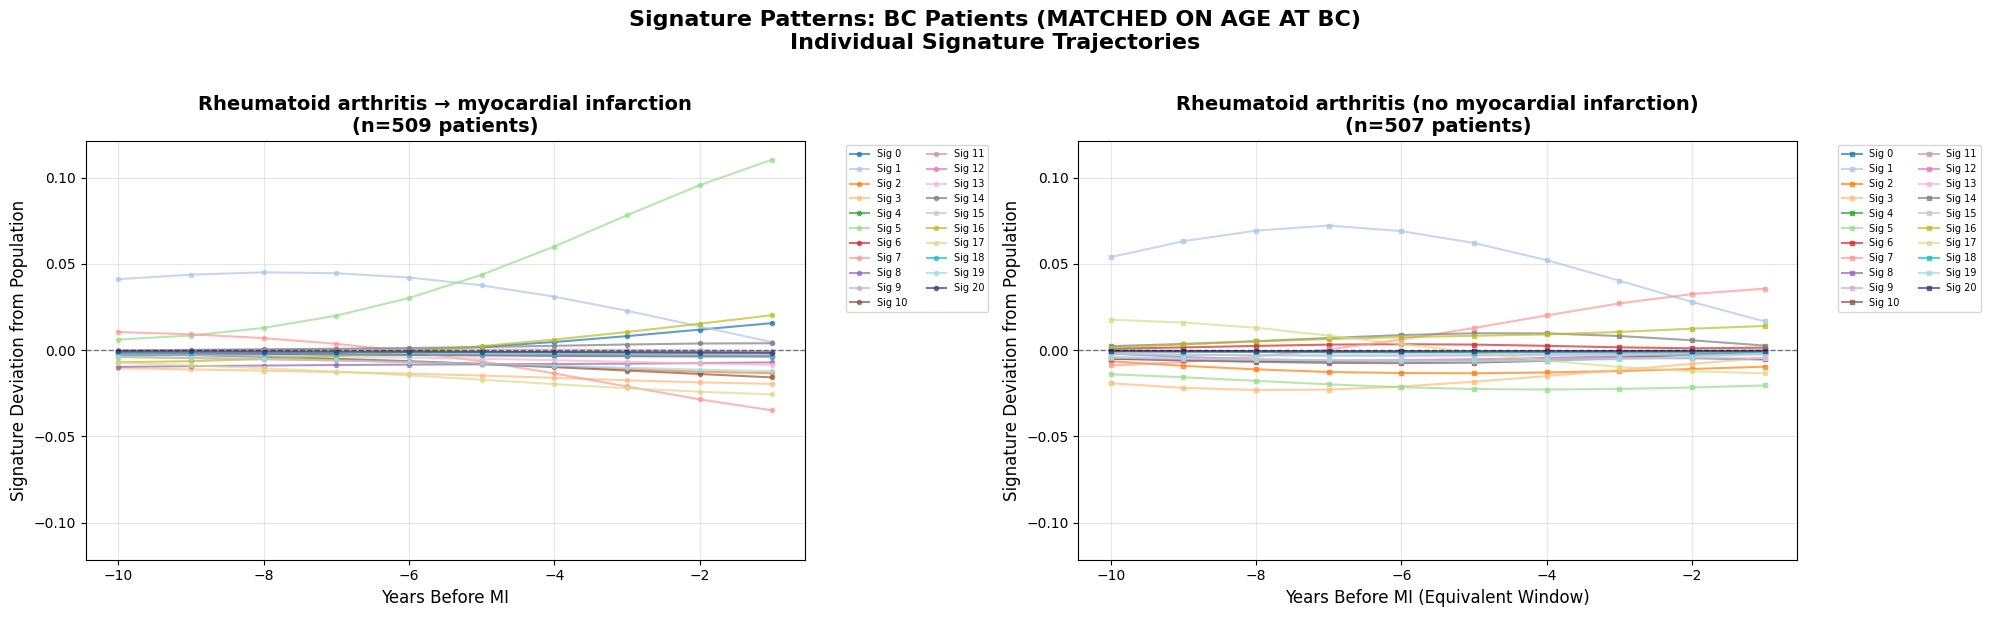

In [30]:

from plot_transition_deviations import plot_bc_to_mi_progression

results = plot_bc_to_mi_progression(
    transition_disease_name='Rheumatoid arthritis',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,       # Years leading up to MI
    age_tolerance=5,        # Match within ±5 years
    min_followup=5,         # Minimum follow-up
    save_plots=True
)


COMPARING SIGNATURE DEVIATIONS (AGE-MATCHED + FOLLOW-UP):
  Transition disease: Rheumatoid arthritis
  Target disease: myocardial infarction
  Age tolerance: ±5 years
  Min follow-up: 5 years

Found target disease: Myocardial infarction (index 112)
Found transition disease: Rheumatoid arthritis (index 297)

Found 9555 patients with Rheumatoid arthritis

Initial patient groups:
  With myocardial infarction: 698 patients
  Without myocardial infarction: 8857 patients

=== AGE MATCHING ===
Age at Rheumatoid arthritis for target group: 33.0 - 80.0
Found 698 age-matched pairs

=== FOLLOW-UP CHECK ===
Control patient 310822: only 3.0 years follow-up (excluded)
Control patient 91686: only 3.0 years follow-up (excluded)
Control patient 146557: only 4.0 years follow-up (excluded)
Control patient 731: only 4.0 years follow-up (excluded)
Control patient 280063: only 0.0 years follow-up (excluded)
Control patient 186760: only 3.0 years follow-up (excluded)
Control patient 120918: only 4.0 years f

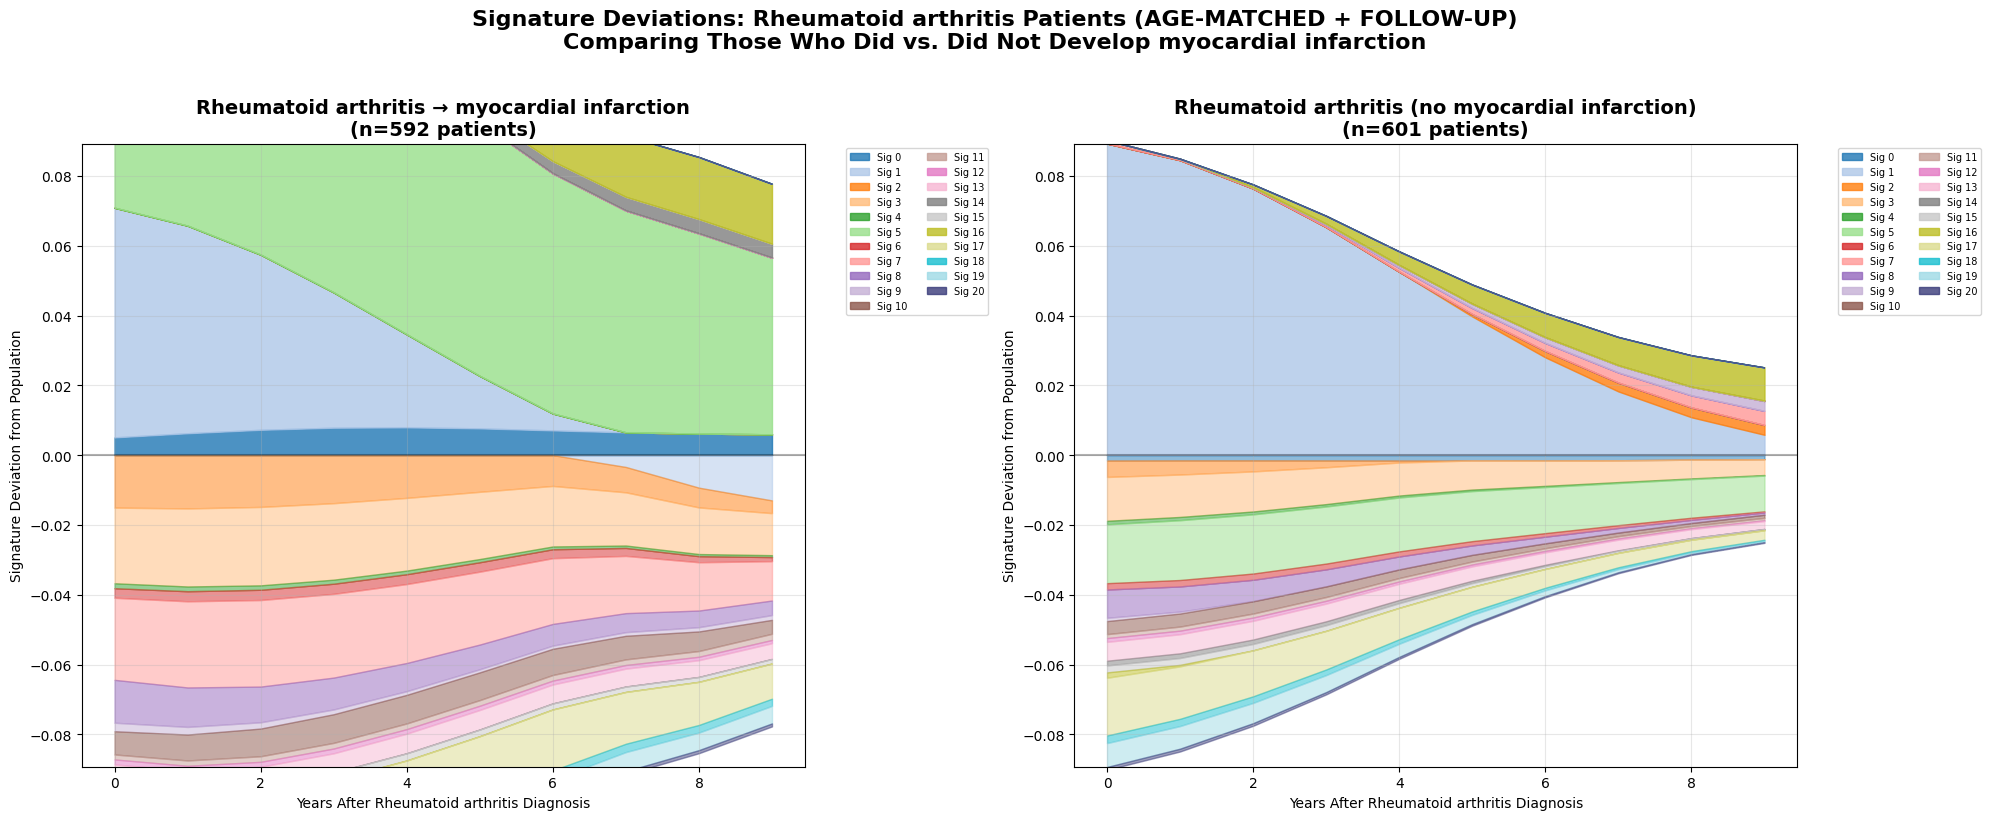

Line plot saved as 'transition_deviations_line_plot_Rheumatoid_arthritis_to_myocardial_infarction.png'


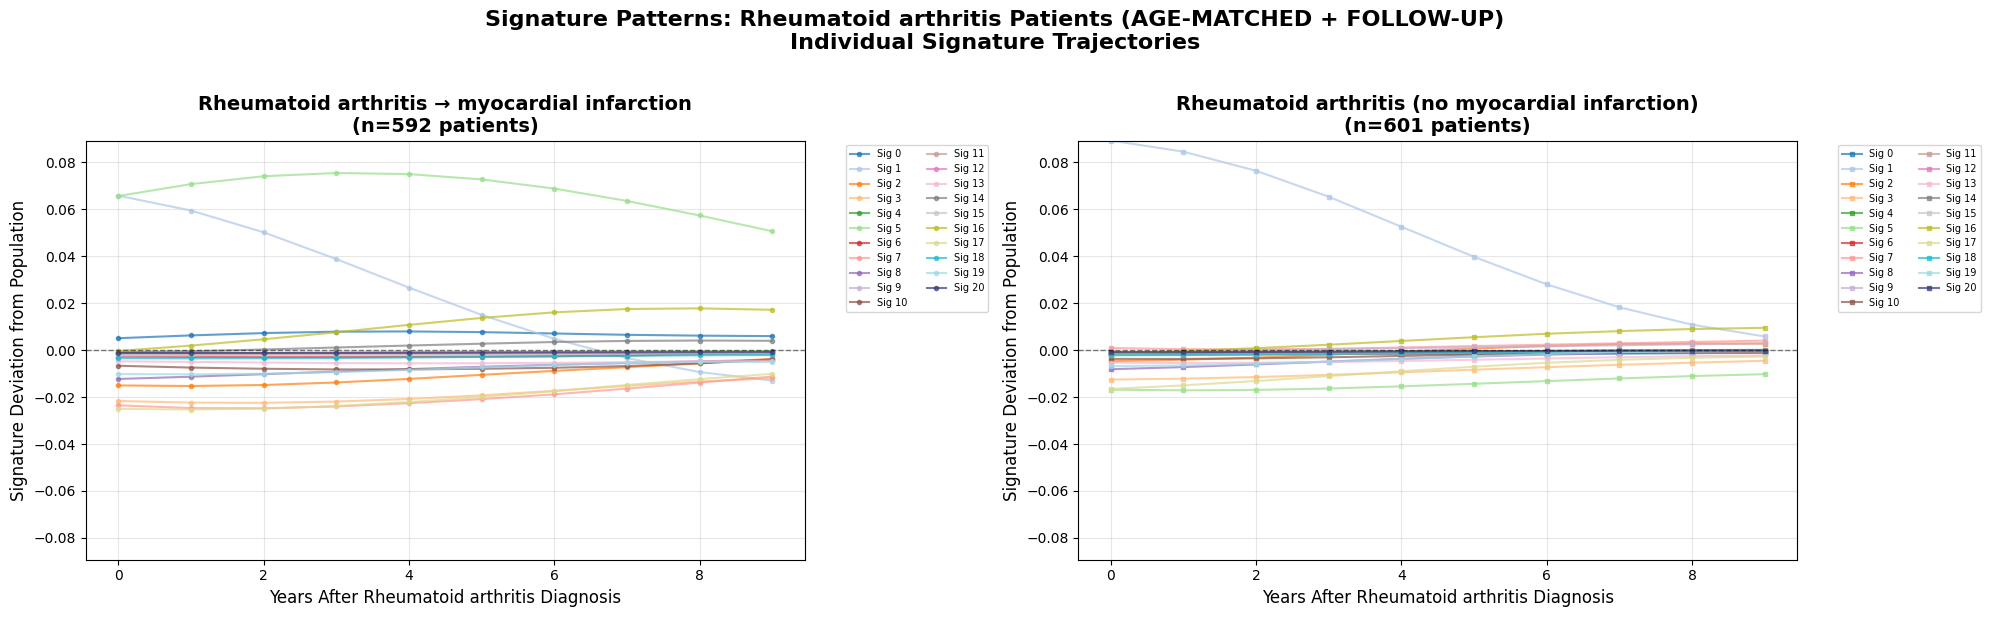

In [29]:
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')


from pathway_discovery import load_full_data
from plot_transition_deviations import plot_transition_vs_nontransition_deviations_fixed

# Load data

results = plot_transition_vs_nontransition_deviations_fixed(
    transition_disease_name='Rheumatoid arthritis',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,
    age_tolerance=5,      # Match within ±5 years
    min_followup=5,       # Minimum 5 years follow-up
    save_plots=True
)

In [ ]:
import pickle as pkl
import pandas as pd
import numpy as np

from pathway_discovery import load_full_data
from pathway_pi_analysis_improved import plot_mi_pi_trajectories

OUTPUT_DIR = 'output_10yr'
PRS_PATH = '/Users/sarahurbut/aladynoulli2/pyScripts/prs_with_eid.csv'
CAD_COL = 'CAD'  # change if your CAD PRS column is named differently

# 1) Load pathway data and processed ID mapping
Y, thetas, disease_names, processed_ids = load_full_data()
res = pkl.load(open(f'{OUTPUT_DIR}/complete_analysis_results.pkl', 'rb'))
mi_patients_all = res['pathway_data_dev']['patients']

# 2) Keep only Pathway 1 patients
p1 = [p for p in mi_patients_all if p['pathway'] == 1]

# 3) Map patient_id -> eid
pid_to_eid = {pid: processed_ids[pid] for pid in [p['patient_id'] for p in p1] if pid < len(processed_ids)}
for p in p1:
    p['eid'] = pid_to_eid.get(p['patient_id'], None)
p1 = [p for p in p1 if p.get('eid') is not None]

# 4) Load PRS and join
prs = pd.read_csv(PRS_PATH)
p1_df = pd.DataFrame({'eid':[p['eid'] for p in p1], 'patient_id':[p['patient_id'] for p in p1], 'age_at_disease':[p['age_at_disease'] for p in p1]})
p1_prs = p1_df.merge(prs, left_on='eid', right_on='PatientID', how='inner')

# 5) Median split on CAD PRS
median_cad = p1_prs[CAD_COL].median()
low_ids  = set(p1_prs[p1_prs[CAD_COL] <= median_cad]['patient_id'])
high_ids = set(p1_prs[p1_prs[CAD_COL] >  median_cad]['patient_id'])

p1_low  = [dict(patient_id=pid, pathway=1, age_at_disease=next(p['age_at_disease'] for p in p1 if p['patient_id']==pid)) for pid in low_ids]
p1_high = [dict(patient_id=pid, pathway=1, age_at_disease=next(p['age_at_disease'] for p in p1 if p['patient_id']==pid)) for pid in high_ids]

# 6) Load π and plot MI-only trajectories for each PRS stratum
pi_all = np.load(f'{OUTPUT_DIR}/all_pi_values.npy', mmap_mode='r')


Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000


In [39]:
model=torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_retrospective_full/enrollment_model_W0.0001_batch_0_10000.pt', weights_only=False)
model['clusters'][297]


1

In [41]:
import numpy as np, torch, pickle as pkl, pandas as pd
from pathway_discovery import load_full_data

OUTPUT_DIR = 'output_10yr'
MODEL_PATH = '/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_retrospective_full/enrollment_model_W0.0001_batch_0_10000.pt'

# Load cluster map (disease -> signature cluster id)
m = torch.load(MODEL_PATH, weights_only=False)
clusters = m['clusters']  # shape [D]
sig5_disease_idx = np.where(clusters == 5)[0]    # indices of diseases in Signature 5 cluster

# Load data and pathways
Y, thetas, disease_names, processed_ids = load_full_data()
res = pkl.load(open(f'{OUTPUT_DIR}/complete_analysis_results.pkl', 'rb'))
patients = res['pathway_data_dev']['patients']
p1 = [p for p in patients if p['pathway'] == 1]

# Age-match: use Pathway 1 average MI age
avg_age_p1 = int(round(np.mean([p['age_at_disease'] for p in p1])))
t_idx = max(1, min(Y.shape[2]-1, avg_age_p1 - 30))

rows = []
N_pop = Y.shape[0]

for d_idx in sig5_disease_idx:
  dname = disease_names[d_idx]

  # Pathway 1 pre-MI prevalence (patient-specific cutoffs)
  cnt_p1 = 0
  for p in p1:
    pid = p['patient_id']; cut = p['age_at_disease'] - 30
    if cut > 0 and Y[pid, d_idx, :cut].sum() > 0:
      cnt_p1 += 1
  prev_p1 = cnt_p1 / len(p1)

  # Population prevalence up to age-matched index
  try:
    pop_cnt = (Y[:, d_idx, :t_idx].sum(dim=1) > 0).sum().item()
  except Exception:
    pop_cnt = (np.array(Y[:, d_idx, :t_idx]).sum(axis=1) > 0).sum()
  prev_pop = pop_cnt / N_pop

  rows.append({
    'disease': dname,
    'prev_p1_preMI': prev_p1,
    'prev_pop_age_matched': prev_pop,
    'delta': prev_p1 - prev_pop,
    'ratio': prev_p1 / (prev_pop + 1e-12)
  })

df = pd.DataFrame(rows).sort_values('ratio', ascending=False)
df.head(30)
# Optionally save:
df.to_csv(f'{OUTPUT_DIR}/sig5_cluster_diseases_prevalence_p1_vs_pop.csv', index=False)
print(f"Saved: {OUTPUT_DIR}/sig5_cluster_diseases_prevalence_p1_vs_pop.csv")

Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
Saved: output_10yr/sig5_cluster_diseases_prevalence_p1_vs_pop.csv


In [42]:
import numpy as np, pandas as pd, pickle as pkl
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from pathway_discovery import load_full_data

OUTPUT_DIR = 'output_10yr'
PCE_CSV = '/Users/sarahurbut/aladynoulli2/pyScripts/df_ukb_pce.csv'  # must contain columns: eid (or PatientID) and pce_goff

# Load pathway results and mapping
Y, thetas, disease_names, processed_ids = load_full_data()
res = pkl.load(open(f'{OUTPUT_DIR}/complete_analysis_results.pkl','rb'))
patients = res['pathway_data_dev']['patients']
mi_pids = set(p['patient_id'] for p in patients)
pathway_by_pid = {p['patient_id']: p['pathway'] for p in patients}
age_by_pid = {p['patient_id']: p['age_at_disease'] for p in patients}

# Build a table: pid, eid, is_mi, pathway (MI only), age (MI age or baseline 65)
rows = []
for pid in range(len(processed_ids)):
    eid = processed_ids[pid]
    is_mi = int(pid in mi_pids)
    pathway = pathway_by_pid.get(pid, np.nan)
    age = age_by_pid.get(pid, 65)
    rows.append((pid, eid, is_mi, pathway, age))
base = pd.DataFrame(rows, columns=['pid','eid','is_mi','pathway','age'])

# Load PCE
pce = pd.read_csv(PCE_CSV)
eid_col = 'Identifier' # if 'eid' in pce.columns else ('PatientID' if 'PatientID' in pce.columns else None)
assert eid_col is not None and 'pce_goff' in pce.columns, "df_ukb_pce.csv must have eid/PatientID and pce_goff"
pce = pce[[eid_col,'pce_goff']].rename(columns={eid_col:'eid'})

# Join and drop missing
df = base.merge(pce, on='eid', how='inner').dropna(subset=['pce_goff'])
print(f"Joined PCE: {df.shape[0]} patients")

# Helper: matched controls by age (±2y) and 1:3 ratio
def matched_controls(cases_df, pool_df, k=3, age_tol=2):
    ctrls = []
    pool = pool_df.copy()
    pool_idx = set(pool.index)
    for _, r in cases_df.iterrows():
        mask = (pool['age'].between(r['age']-age_tol, r['age']+age_tol))
        cand = pool[mask]
        if len(cand) == 0: 
            continue
        take = resample(cand, n_samples=min(k, len(cand)), replace=False, random_state=42)
        ctrls.append(take)
        pool = pool.drop(index=take.index, errors='ignore')
    return pd.concat(ctrls) if ctrls else pool_df.iloc[0:0]

# AUROC overall (MI vs non-MI)
overall = df[['pce_goff','is_mi']].dropna()
auc_overall = roc_auc_score(overall['is_mi'], overall['pce_goff'])
print(f"Overall AUROC (PCE, MI vs non-MI): {auc_overall:.3f}")

# AUROC by pathway (cases = MI in pathway X; controls = matched non-MI)
for pw in sorted(df.loc[df['is_mi']==1,'pathway'].dropna().unique()):
    cases = df[(df['is_mi']==1) & (df['pathway']==pw)][['pce_goff','age']]
    pool = df[df['is_mi']==0][['pce_goff','age']]
    ctrls = matched_controls(cases, pool, k=3, age_tol=2)
    if len(cases)==0 or len(ctrls)==0:
        print(f"Pathway {int(pw)}: insufficient data")
        continue
    tmp = pd.concat([
        pd.DataFrame({'pce_goff': cases['pce_goff'].values, 'label': np.ones(len(cases))}),
        pd.DataFrame({'pce_goff': ctrls['pce_goff'].values, 'label': np.zeros(len(ctrls))})
    ], ignore_index=True)
    auc = roc_auc_score(tmp['label'], tmp['pce_goff'])
    print(f"Pathway {int(pw)} AUROC (cases vs matched non-MI): {auc:.3f}")

# Optional: compare Pathway 1 vs other MI pathways on PCE levels (case-only)
mi_only = df[df['is_mi']==1].dropna(subset=['pathway'])
p1 = mi_only[mi_only['pathway']==1]['pce_goff']
p_others = mi_only[mi_only['pathway']!=1]['pce_goff']
print(f"PCE median (Pathway 1 MI): {np.median(p1):.3f} vs other MI: {np.median(p_others):.3f} (n={len(p1)} vs {len(p_others)})")

Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
Joined PCE: 314237 patients
Overall AUROC (PCE, MI vs non-MI): 0.720
Pathway 0 AUROC (cases vs matched non-MI): 0.801
Pathway 1 AUROC (cases vs matched non-MI): 0.712
Pathway 2 AUROC (cases vs matched non-MI): 0.710
Pathway 3 AUROC (cases vs matched non-MI): 0.732
PCE median (Pathway 1 MI): 0.122 vs other MI: 0.131 (n=8330 vs 10245)


In [21]:


def subset_data(Y, E, G, start_index, end_index):
    """Subset data based on indices."""
    indices = list(range(start_index, end_index))
    Y_subset = Y[indices]
    E_subset = E[indices]
    G_subset = G[indices]
    return Y_subset, E_subset, G_subset, indices

def load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_enrollment_full.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()


Loading components...
Loaded all components successfully!


COMPARING MI PATIENTS WITH vs WITHOUT BREAST CANCER
Target disease: myocardial infarction
Precursor disease: breast cancer
Found target disease: Myocardial infarction (index 112)
Found transition disease: Breast cancer [female] (index 16)
Population reference shape: (21, 52)
Found 24920 patients with myocardial infarction

Initial MI patient groups:
  With breast cancer: 64 patients
  Without breast cancer: 24856 patients

=== AGE MATCHING AT MI DIAGNOSIS ===
Age tolerance: ±5 years
Min follow-up: 5 years
Age at MI for precursor group: 50.0 - 80.0
Found 64 age-matched pairs

=== FOLLOW-UP CHECK ===
Control patient 246903: only 4.0 years follow-up (excluded)
Control patient 277498: only 2.0 years follow-up (excluded)
Control patient 106961: only 0.0 years follow-up (excluded)
Control patient 234928: only 0.0 years follow-up (excluded)
Control patient 20421: only 1.0 years follow-up (excluded)
Control patient 141355: only 2.0 years follow-up (excluded)
Control patient 10271: only 4.0 yea

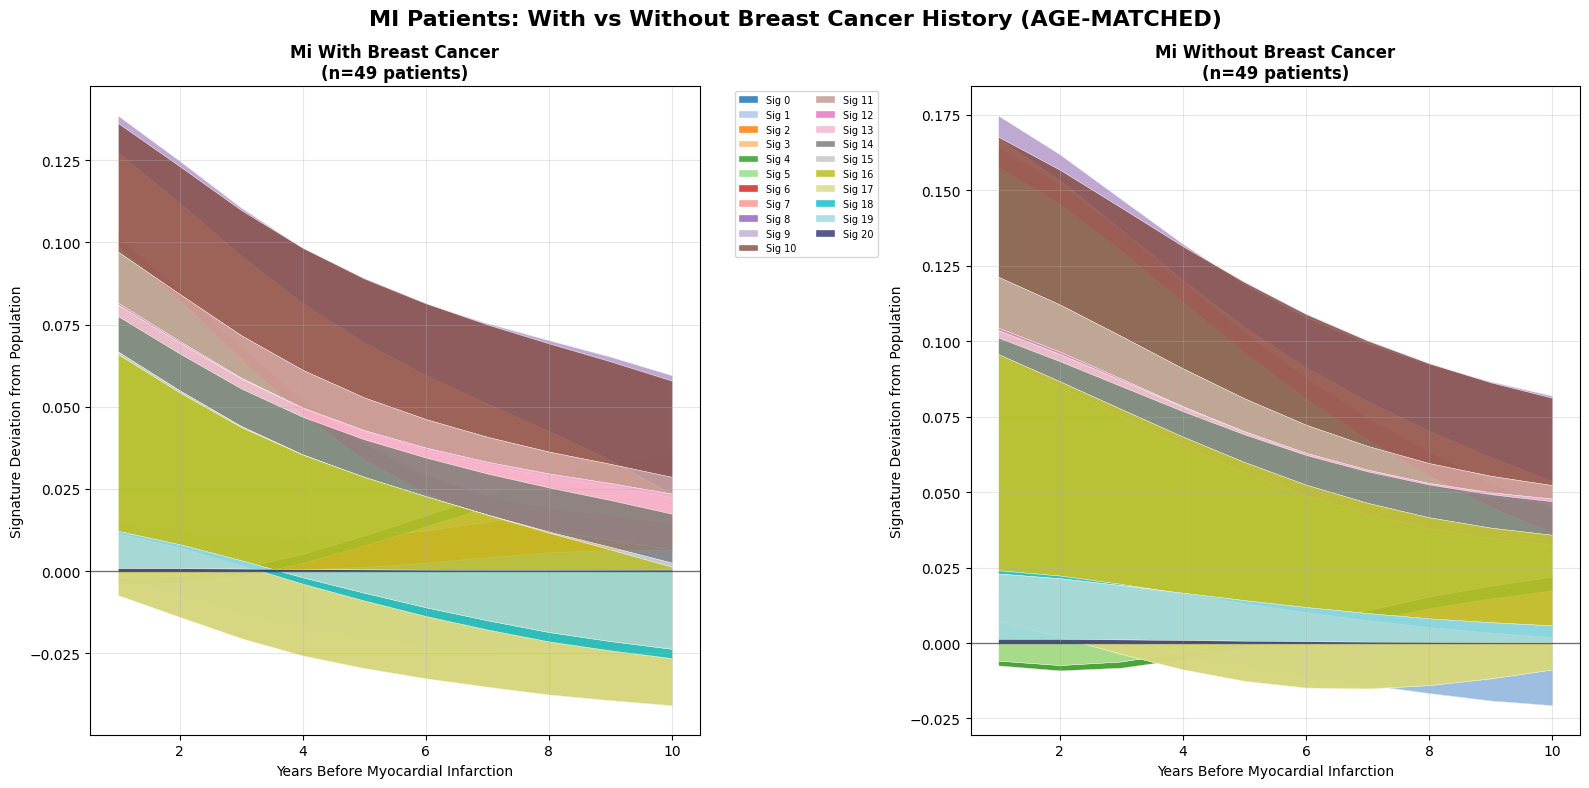

Line plot saved as 'mi_with_vs_without_breast_cancer_line_plot.png'


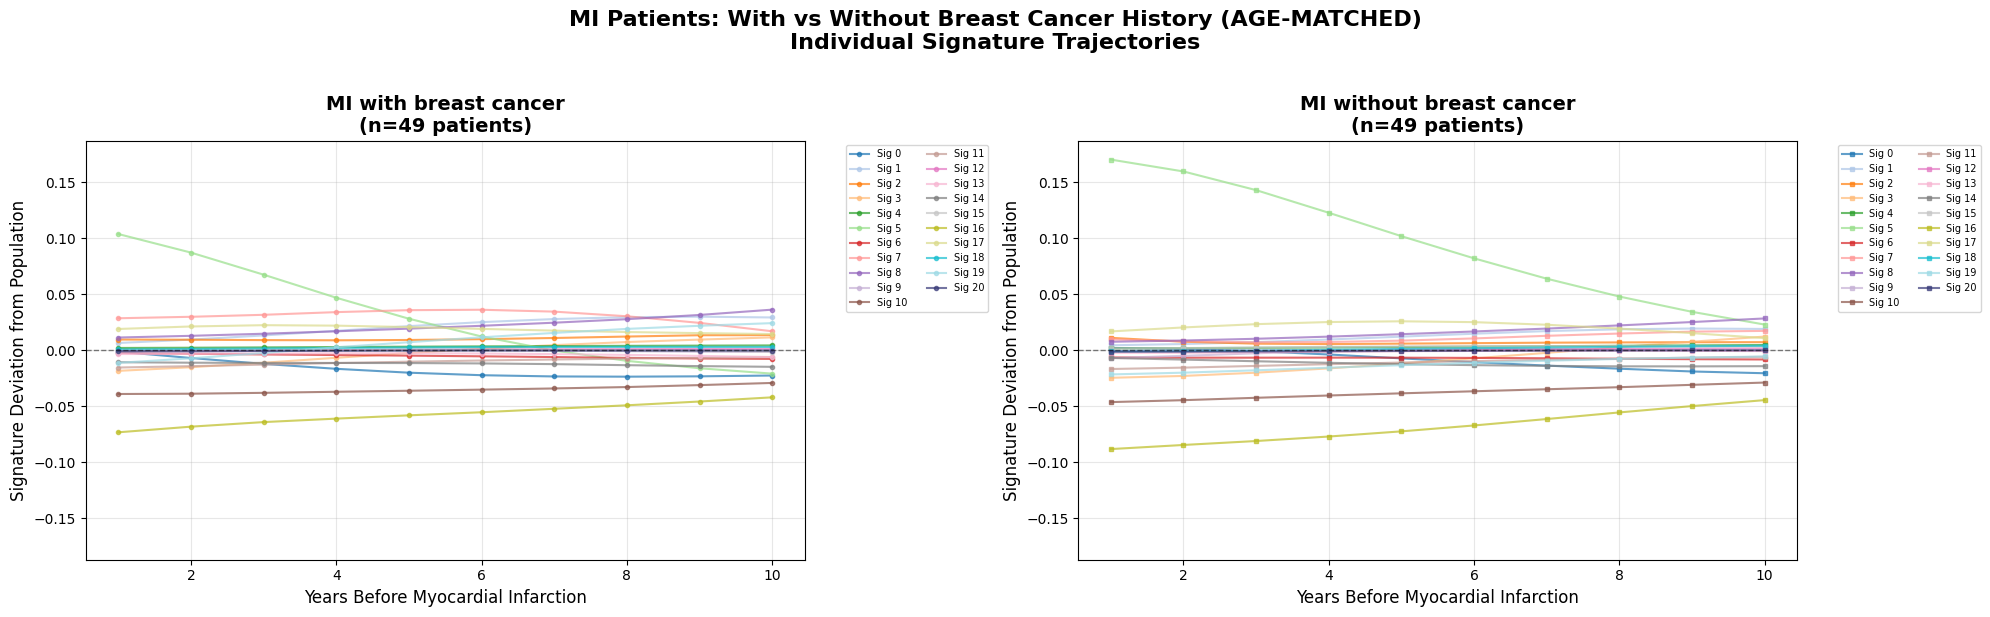


=== SUMMARY STATISTICS (AGE-MATCHED) ===
MI patients with breast cancer: 49
MI patients without breast cancer: 49

Mean signature deviations:
MI with breast cancer:
  Sig 0: -0.0173
  Sig 1: +0.0209
  Sig 2: +0.0105
  Sig 3: -0.0021
  Sig 4: +0.0031
  Sig 5: +0.0298
  Sig 6: -0.0053
  Sig 7: +0.0301
  Sig 8: +0.0216
  Sig 9: -0.0009
  Sig 10: -0.0352
  Sig 11: -0.0103
  Sig 12: +0.0003
  Sig 13: -0.0038
  Sig 14: -0.0123
  Sig 15: -0.0004
  Sig 16: -0.0570
  Sig 17: +0.0187
  Sig 18: +0.0021
  Sig 19: +0.0080
  Sig 20: -0.0006

MI without breast cancer:
  Sig 0: -0.0090
  Sig 1: +0.0127
  Sig 2: +0.0069
  Sig 3: -0.0083
  Sig 4: +0.0030
  Sig 5: +0.0947
  Sig 6: -0.0072
  Sig 7: +0.0112
  Sig 8: +0.0164
  Sig 9: -0.0014
  Sig 10: -0.0377
  Sig 11: -0.0109
  Sig 12: +0.0003
  Sig 13: -0.0013
  Sig 14: -0.0120
  Sig 15: +0.0029
  Sig 16: -0.0683
  Sig 17: +0.0204
  Sig 18: +0.0013
  Sig 19: -0.0130
  Sig 20: -0.0007

Difference (with - without):
  Sig 0: -0.0083 ↓
  Sig 1: +0.0082 ↑
  S

In [11]:
from plot_mi_with_vs_without_precursor import plot_mi_with_vs_without_precursor

# Compare MI patients who had RA vs MI patients who did NOT have RA
mi_comparison_results = plot_mi_with_vs_without_precursor(
    transition_disease_name='breast cancer',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,
    age_tolerance=5,      # Match within ±5 years
    min_followup=5,       # Minimum 5 years follow-up
    save_plots=True
)


SIGNATURE CORRELATION ANALYSIS
Analyzing 400000 patients, 21 signatures, 52 timepoints

Calculating overall signature correlations...
Correlation matrix shape: (21, 21)

Top 15 most correlated signature pairs:
  1. Sig 5 vs Sig 8: -0.4412
  2. Sig 3 vs Sig 7: -0.3336
  3. Sig 12 vs Sig 20: 0.3271
  4. Sig 5 vs Sig 18: -0.3237
  5. Sig 8 vs Sig 13: -0.3208
  6. Sig 7 vs Sig 13: -0.3193
  7. Sig 1 vs Sig 5: -0.3021
  8. Sig 12 vs Sig 13: 0.2991
  9. Sig 5 vs Sig 20: -0.2960
  10. Sig 3 vs Sig 8: -0.2926
  11. Sig 5 vs Sig 19: -0.2898
  12. Sig 5 vs Sig 15: 0.2780
  13. Sig 19 vs Sig 20: 0.2697
  14. Sig 18 vs Sig 20: 0.2605
  15. Sig 7 vs Sig 17: -0.2602

Calculating correlations by age...
  Age 30: Average correlation = 0.0383
  Age 40: Average correlation = 0.0645
  Age 50: Average correlation = 0.0487
  Age 60: Average correlation = 0.0340
  Age 70: Average correlation = 0.0178
  Age 80: Average correlation = -0.0174

Creating visualizations...

Plot saved as 'signature_correlation_a

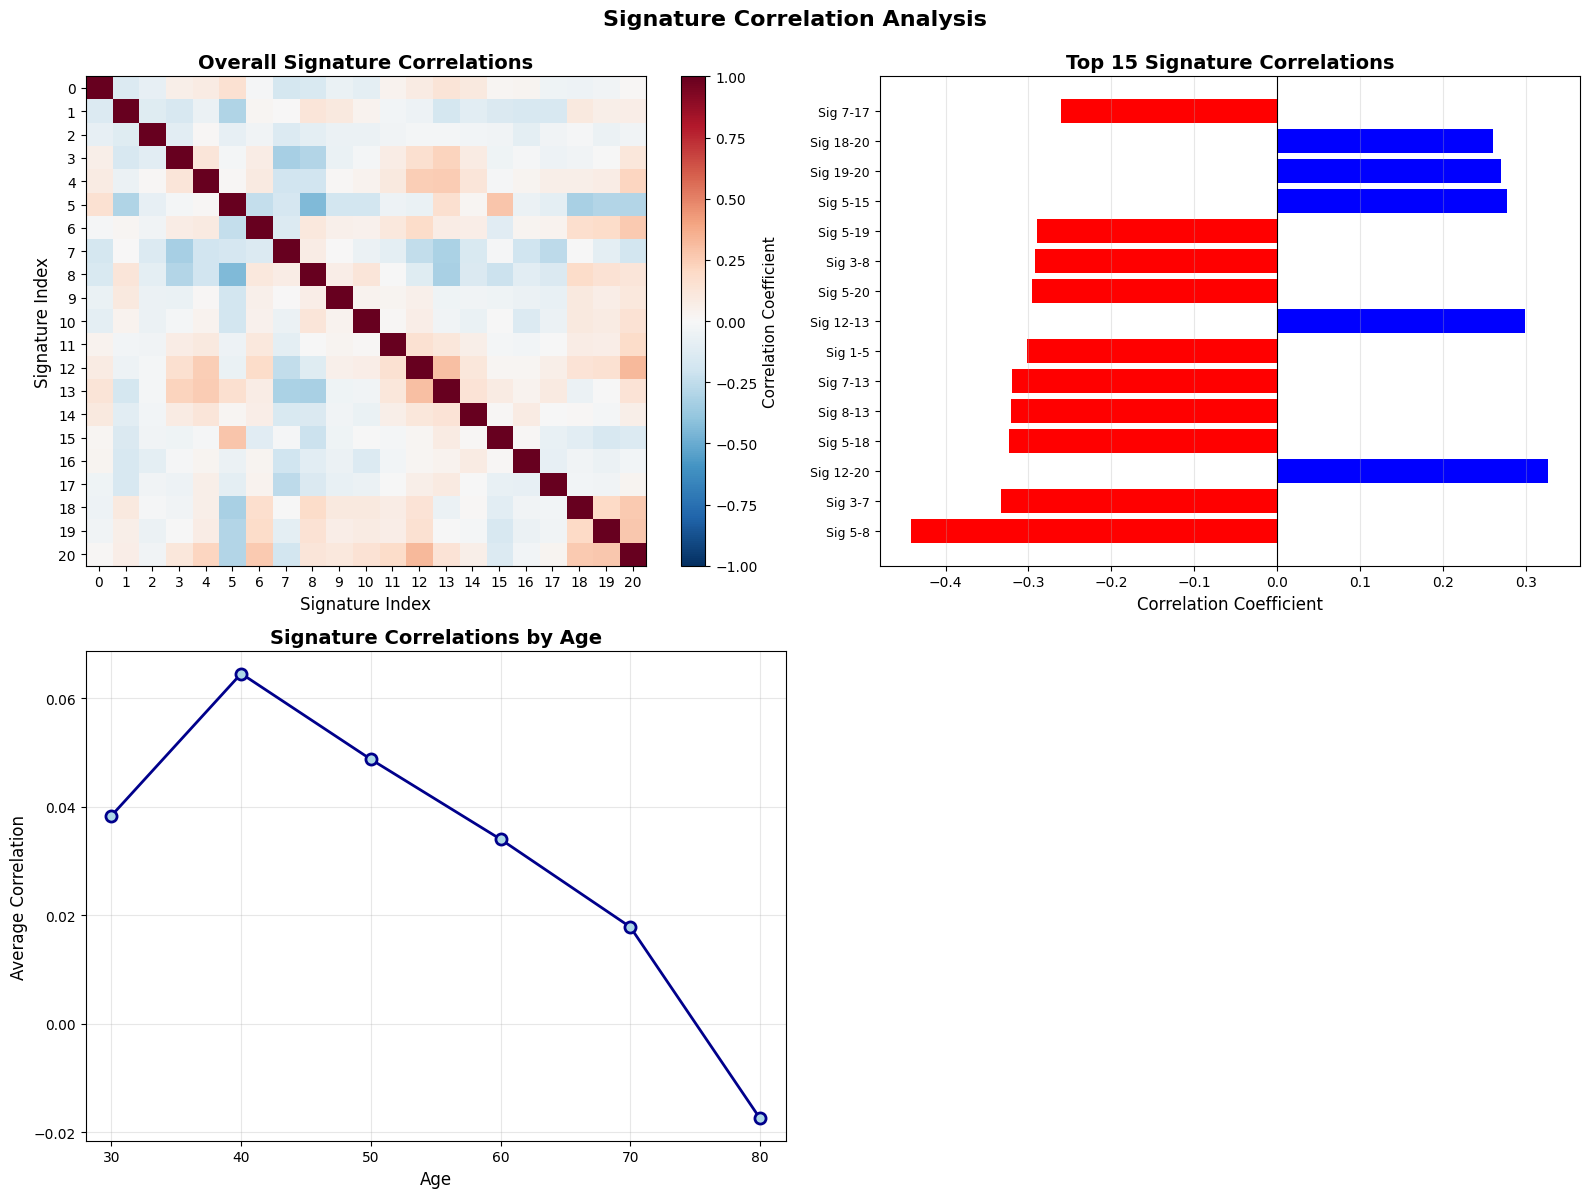

In [ ]:
from recreate_signature_correlations import analyze_and_plot_signature_correlations
import torch
import pandas as pd

disease_names = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/disease_names.csv')['x'].tolist()
new_lambdas = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/new_lambdas_with_pcs_retrospective.pt').detach().numpy()
new_thetas = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/new_thetas_with_pcs_retrospective.pt').detach().numpy()
# Analyze correlations
# With your already-loaded data:
results = analyze_and_plot_signature_correlations(new_thetas, disease_names=disease_names)


SIGNATURE CORRELATION ANALYSIS
Analyzing 400000 patients, 21 signatures, 52 timepoints

Calculating overall signature correlations...
Correlation matrix shape: (21, 21)

Top 15 most correlated signature pairs:
  1. Sig 12 vs Sig 20: 0.4186
  2. Sig 5 vs Sig 20: -0.3583
  3. Sig 7 vs Sig 20: -0.3161
  4. Sig 19 vs Sig 20: 0.3082
  5. Sig 3 vs Sig 7: -0.3066
  6. Sig 13 vs Sig 20: 0.3066
  7. Sig 4 vs Sig 20: 0.2996
  8. Sig 6 vs Sig 20: 0.2931
  9. Sig 5 vs Sig 12: -0.2868
  10. Sig 5 vs Sig 6: -0.2738
  11. Sig 18 vs Sig 20: 0.2683
  12. Sig 12 vs Sig 13: 0.2681
  13. Sig 5 vs Sig 19: -0.2609
  14. Sig 5 vs Sig 18: -0.2564
  15. Sig 3 vs Sig 5: -0.2553

Calculating correlations by age...
  Age 30: Average correlation = 0.0239
  Age 40: Average correlation = 0.0393
  Age 50: Average correlation = 0.0422
  Age 60: Average correlation = 0.0374
  Age 70: Average correlation = 0.0226
  Age 80: Average correlation = -0.0182

Creating visualizations...

Plot saved as 'signature_correlation_a

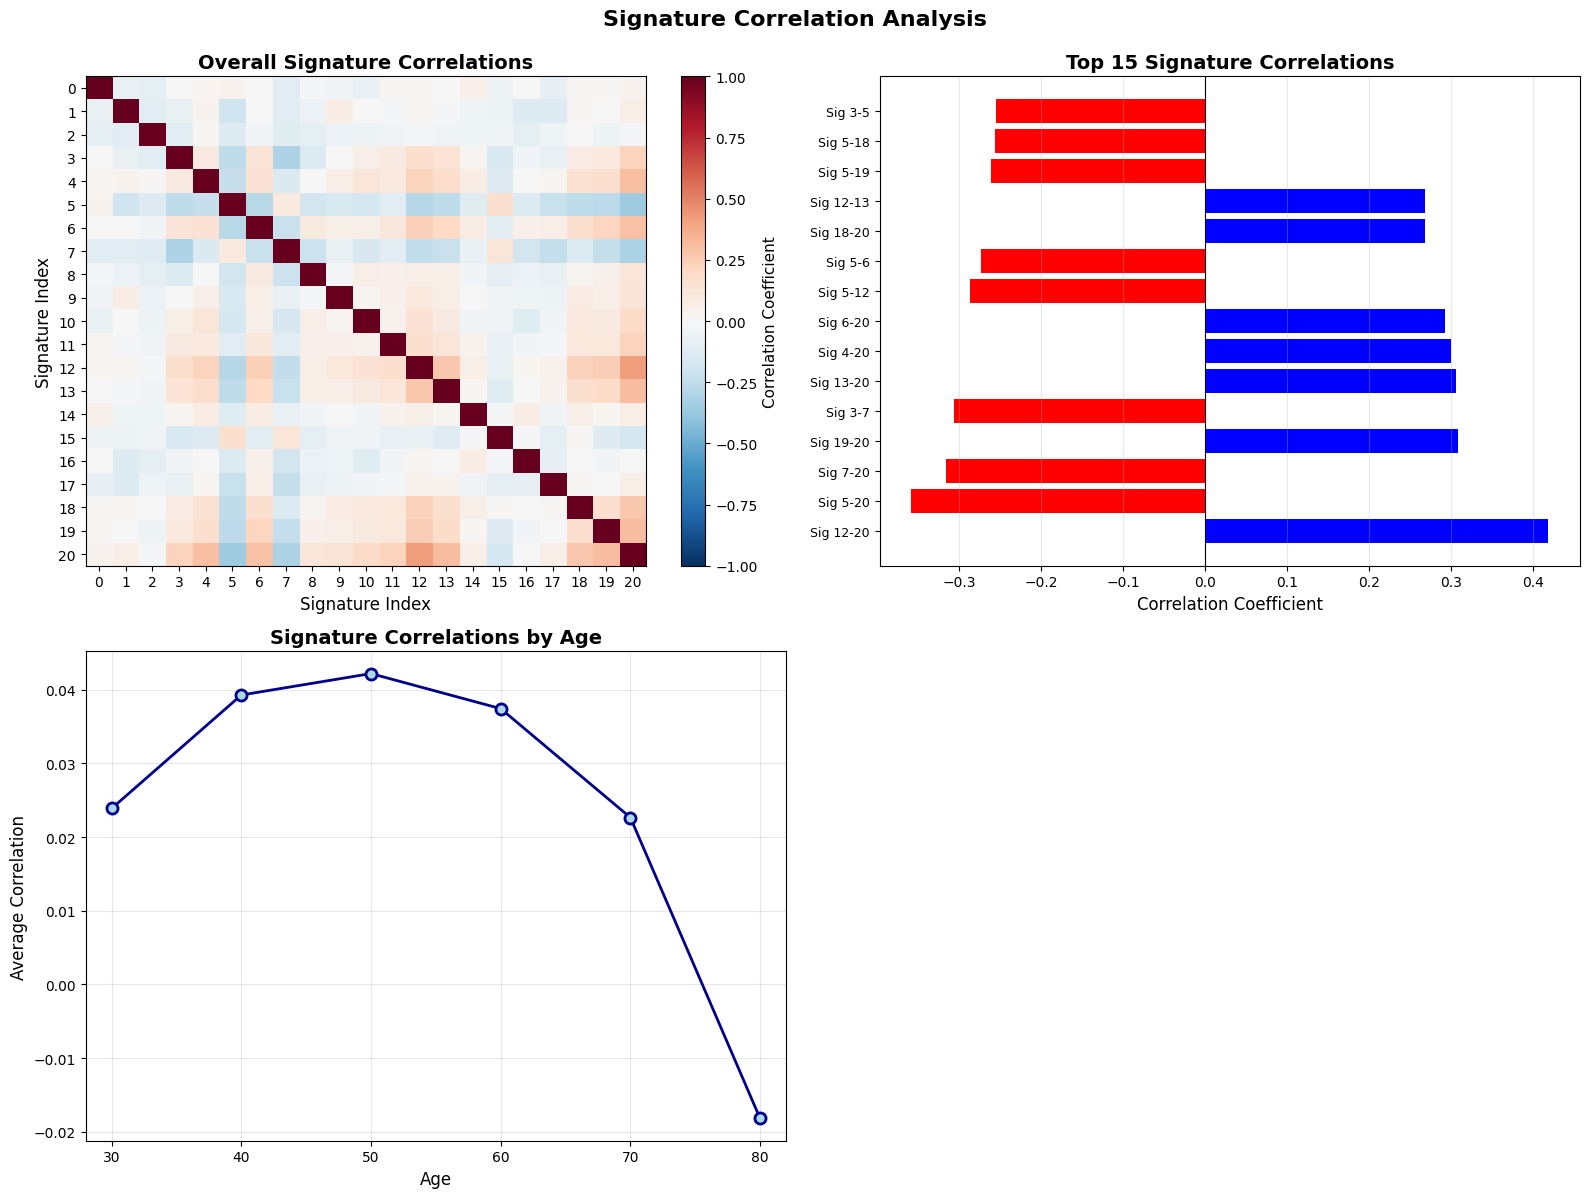

In [10]:
old_thetas = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/big_stuff/all_patient_thetas_alltime.pt').detach().numpy()
# With your already-loaded data:
results = analyze_and_plot_signature_correlations(old_thetas, disease_names=disease_names)